<a href="https://colab.research.google.com/github/solwinkel/Analisis-predictivo/blob/main/FinalPredictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **82.05 - Análisis Predictivo**
Examen final

Sol Winkel

Dataset: Hotel Reservations

Variable target: booking_status

# Librerías + leer dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dfOriginal = pd.read_csv('Hotel Reservations.csv')

# Análisis exploratorio

In [3]:
num_filas = dfOriginal.shape[0]
num_columnas = dfOriginal.shape[1]

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 36275
Número de columnas: 19


In [4]:
dfOriginal.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
! pip install tabulate

In [13]:
from tabulate import tabulate

data = dfOriginal.head(10).values.tolist()
headers = dfOriginal.head(10).columns.tolist()
tabla = tabulate(data, headers, tablefmt="fancy_grid")
print(tabla)

╒══════════════╤════════════════╤══════════════════╤════════════════════════╤═════════════════════╤═════════════════════╤══════════════════════════════╤══════════════════════╤═════════════╤════════════════╤═════════════════╤════════════════╤═══════════════════════╤══════════════════╤════════════════════════════════╤════════════════════════════════════════╤══════════════════════╤══════════════════════════╤══════════════════╕
│ Booking_ID   │   no_of_adults │   no_of_children │   no_of_weekend_nights │   no_of_week_nights │ type_of_meal_plan   │   required_car_parking_space │ room_type_reserved   │   lead_time │   arrival_year │   arrival_month │   arrival_date │ market_segment_type   │   repeated_guest │   no_of_previous_cancellations │   no_of_previous_bookings_not_canceled │   avg_price_per_room │   no_of_special_requests │ booking_status   │
╞══════════════╪════════════════╪══════════════════╪════════════════════════╪═════════════════════╪═════════════════════╪═══════════════════════

In [7]:
dfOriginal.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [8]:
dfOriginal.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [9]:
dfOriginal.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Chequeo de duplicados

In [10]:
hay_duplicados = dfOriginal['Booking_ID'].duplicated().any()

if hay_duplicados:
    print("Existen valores duplicados en la columna 'id'.")
else:
    print("No hay valores duplicados en la columna 'id'.")

No hay valores duplicados en la columna 'id'.


In [11]:
minimo = dfOriginal['arrival_year'].min()
maximo = dfOriginal['arrival_year'].max()

print("Valor mínimo:", minimo)
print("Valor máximo:", maximo)

Valor mínimo: 2017
Valor máximo: 2018


Los registros son de reservas del 2017 y 2018

# Análisis de datos faltantes

In [14]:
nulos_por_columna = dfOriginal.isnull().sum()

for columna, cantidad_nulos in nulos_por_columna.items():
    print(f'Columna: {columna}, Nulos: {cantidad_nulos}')

Columna: Booking_ID, Nulos: 0
Columna: no_of_adults, Nulos: 0
Columna: no_of_children, Nulos: 0
Columna: no_of_weekend_nights, Nulos: 0
Columna: no_of_week_nights, Nulos: 0
Columna: type_of_meal_plan, Nulos: 0
Columna: required_car_parking_space, Nulos: 0
Columna: room_type_reserved, Nulos: 0
Columna: lead_time, Nulos: 0
Columna: arrival_year, Nulos: 0
Columna: arrival_month, Nulos: 0
Columna: arrival_date, Nulos: 0
Columna: market_segment_type, Nulos: 0
Columna: repeated_guest, Nulos: 0
Columna: no_of_previous_cancellations, Nulos: 0
Columna: no_of_previous_bookings_not_canceled, Nulos: 0
Columna: avg_price_per_room, Nulos: 0
Columna: no_of_special_requests, Nulos: 0
Columna: booking_status, Nulos: 0


No hay datos nulos en ninguna de las columnas

# Creación de nuevas variables

**total_huespedes**: se calcula la cantidad total de huespedes, sumando la cantidad de adultos y la cantidad de chicos.

In [15]:
dfOriginal['total_huespedes'] = dfOriginal['no_of_adults'] + dfOriginal['no_of_children']

**total_noches**: se calcula la cantidad total de noches, sumando las noches de semana y de fin de semana

In [16]:
dfOriginal['total_noches'] = dfOriginal['no_of_weekend_nights'] + dfOriginal['no_of_week_nights']

**fecha_llegada**: Se utiliza el día, mes y año para formar la fecha de llegada del huesped

Día que no existe. 29 de Febrero de 2018 que no es un año bisiesto

In [17]:
#modifico el registro para el 28, asumiendo que es un error de la reserva
filtro = (dfOriginal['arrival_month'] == 2) & (dfOriginal['arrival_date'] == 29)
registros_filtrados = dfOriginal[filtro]
dfOriginal.loc[filtro, 'arrival_date'] = 28

In [18]:
dfOriginal['fecha_llegada'] = dfOriginal['arrival_year'].astype(str) + '/' + dfOriginal['arrival_month'].astype(str) + '/' + dfOriginal['arrival_date'].astype(str)

In [19]:
pd.to_datetime(dfOriginal['fecha_llegada'], format='%Y/%m/%d')

0       2017-10-02
1       2018-11-06
2       2018-02-28
3       2018-05-20
4       2018-04-11
           ...    
36270   2018-08-03
36271   2018-10-17
36272   2018-07-01
36273   2018-04-21
36274   2018-12-30
Name: fecha_llegada, Length: 36275, dtype: datetime64[ns]

In [20]:
dfOriginal['fecha_llegada'].dtypes

dtype('O')

**familia**: Se analiza si es una familia o no.

Se considera familia en caso de tener hijos

In [21]:
dfOriginal['familia'] = np.where((dfOriginal['no_of_children'] > 0) & (dfOriginal['no_of_adults'] > 0), 1, 0)

**menores_solos**: Se analiza si hay menores solos o no

In [22]:
dfOriginal['menores_solos'] = np.where((dfOriginal['no_of_adults'] == 0) & (dfOriginal['no_of_children'] > 0), 1, 0)

# Modificación variables no númericas

**Booking_id**

In [23]:
dfOriginal['Booking_ID'].dtypes
print(dfOriginal['Booking_ID'])

0        INN00001
1        INN00002
2        INN00003
3        INN00004
4        INN00005
           ...   
36270    INN36271
36271    INN36272
36272    INN36273
36273    INN36274
36274    INN36275
Name: Booking_ID, Length: 36275, dtype: object


In [24]:
INN = dfOriginal['Booking_ID'].str.startswith('INN').all()
if INN:
    print(f'Todos los registros de la columna  inician con "INN"')
else:
    print(f'No todos los registros de la columna inician con "INN"')

Todos los registros de la columna  inician con "INN"


In [25]:
dfOriginal['Booking_ID'] = dfOriginal['Booking_ID'].str.slice(3)

In [26]:
dfOriginal['Booking_ID'] = dfOriginal['Booking_ID'].astype(int)

**Type of meal plan**

In [27]:
valores_unicos = dfOriginal['type_of_meal_plan'].unique()

cantidad_valores_unicos = len(valores_unicos)
print(f'Valores únicos ({cantidad_valores_unicos}):')
for valor in valores_unicos:
    print(valor)

Valores únicos (4):
Meal Plan 1
Not Selected
Meal Plan 2
Meal Plan 3


In [28]:
diccionario_reemplazos = {'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3, 'Not Selected': 0}
dfOriginal['type_of_meal_plan'] = dfOriginal['type_of_meal_plan'].replace(diccionario_reemplazos)

**Room type reserved**

In [29]:
valores_unicos = dfOriginal['room_type_reserved'].unique()

cantidad_valores_unicos = len(valores_unicos)
print(f'Valores únicos ({cantidad_valores_unicos}):')
for valor in valores_unicos:
    print(valor)

Valores únicos (7):
Room_Type 1
Room_Type 4
Room_Type 2
Room_Type 6
Room_Type 5
Room_Type 7
Room_Type 3


In [30]:
diccionario_reemplazos = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4,'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7 }
dfOriginal['room_type_reserved'] = dfOriginal['room_type_reserved'].replace(diccionario_reemplazos)

**Market Segment type**

In [31]:
valores_unicos = dfOriginal['market_segment_type'].unique()

cantidad_valores_unicos = len(valores_unicos)
print(f'Valores únicos ({cantidad_valores_unicos}):')
for valor in valores_unicos:
    print(valor)

Valores únicos (5):
Offline
Online
Corporate
Aviation
Complementary


In [32]:
diccionario_reemplazos = {'Offline': 1, 'Online': 2, 'Corporate': 3, 'Aviation': 4,'Complementary': 5}
dfOriginal['market_segment_type'] = dfOriginal['market_segment_type'].replace(diccionario_reemplazos)

# Outliers (valores atípicos)

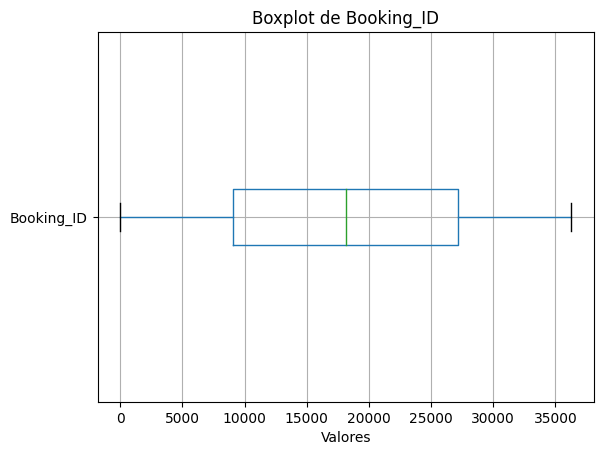

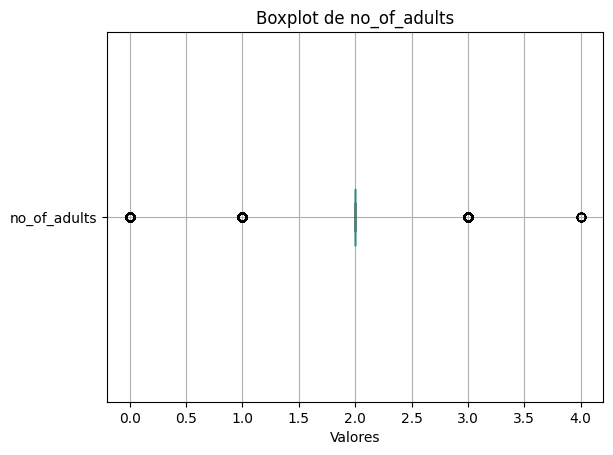

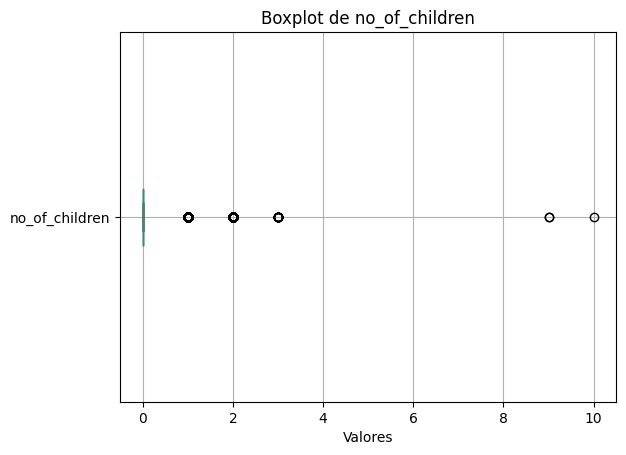

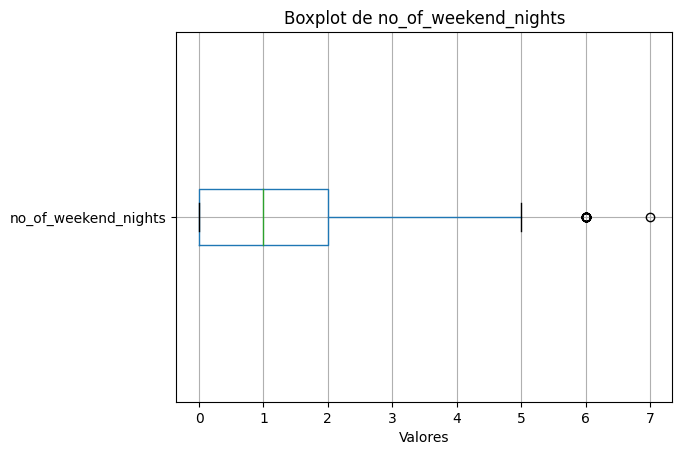

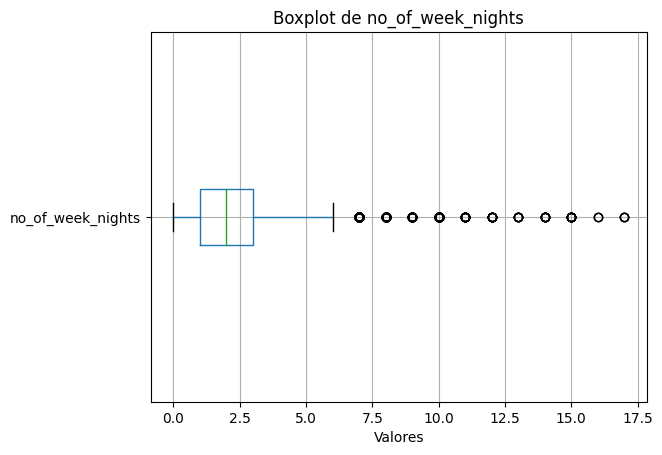

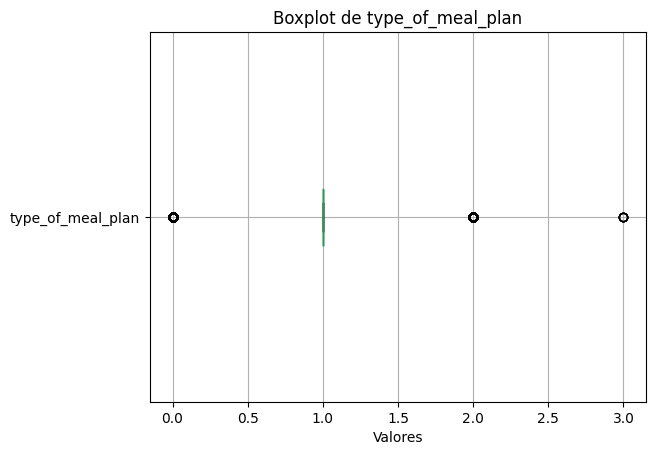

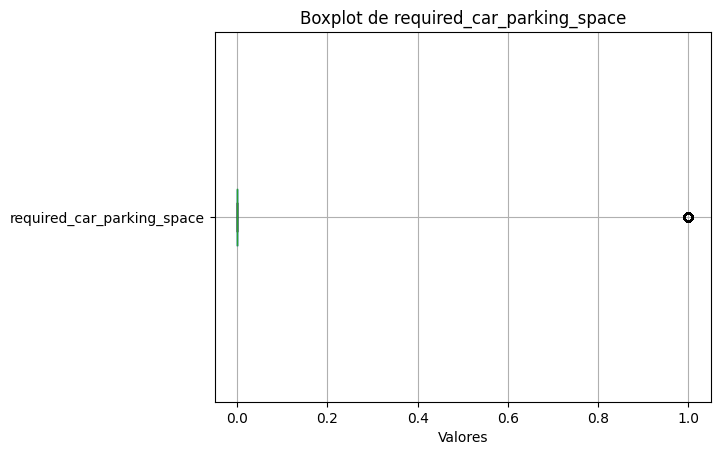

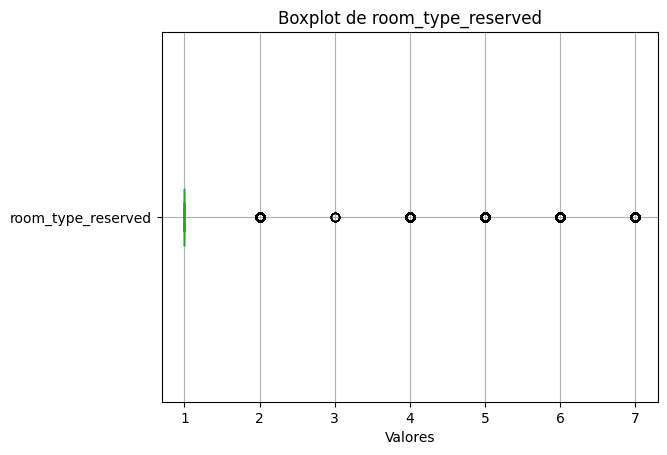

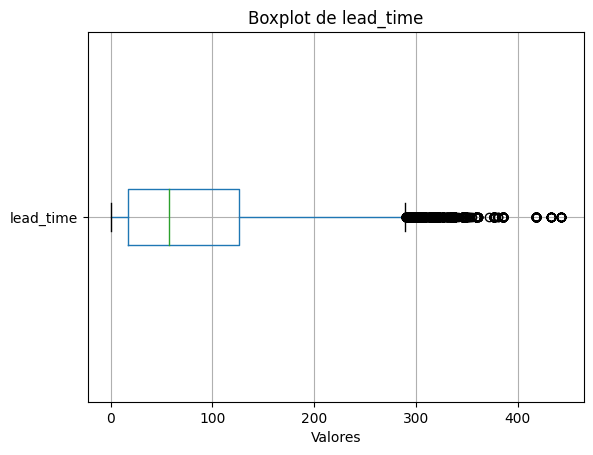

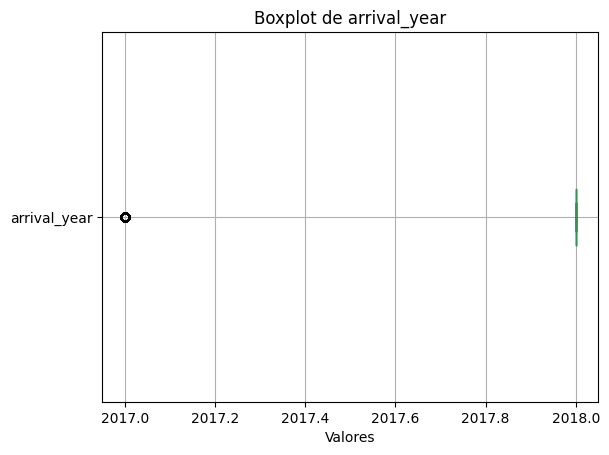

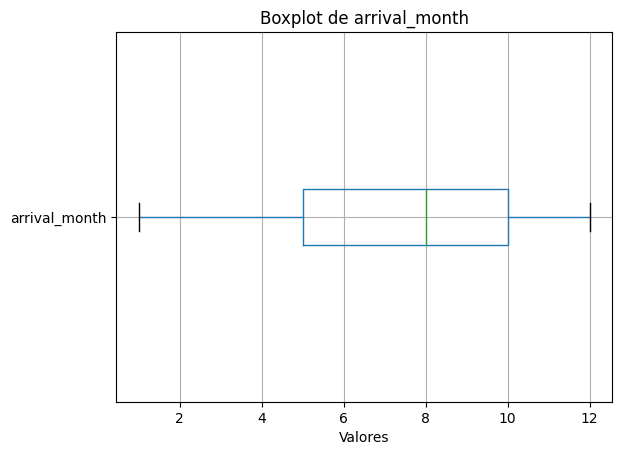

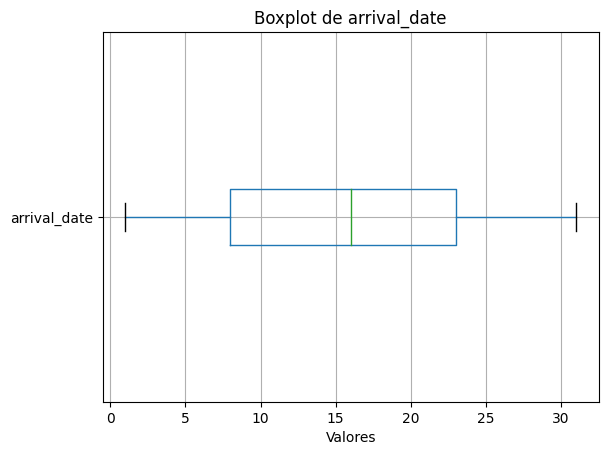

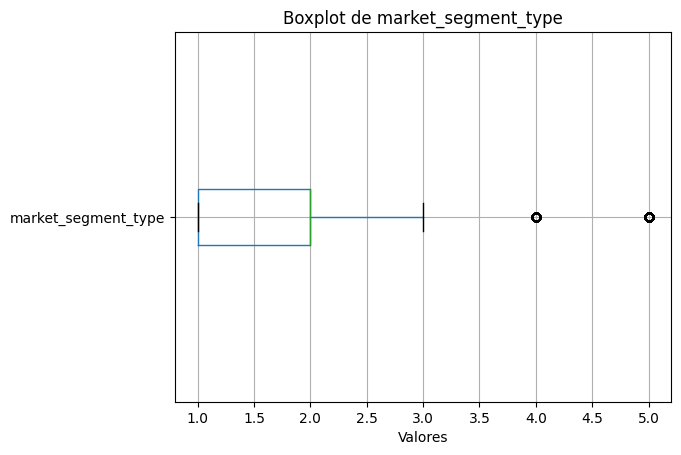

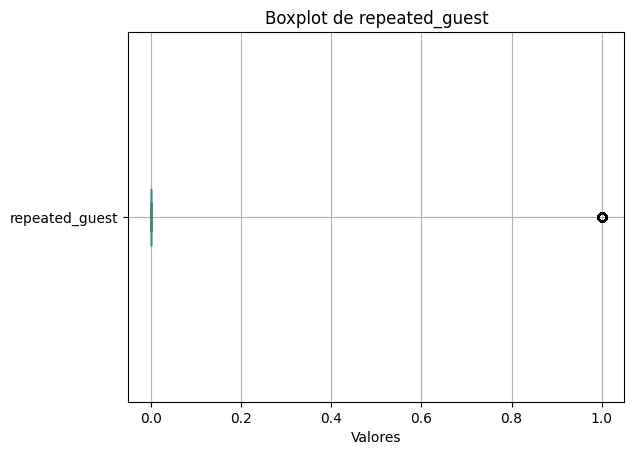

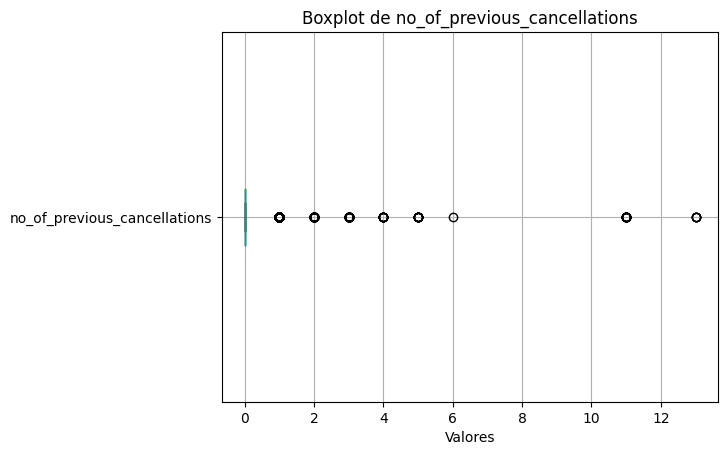

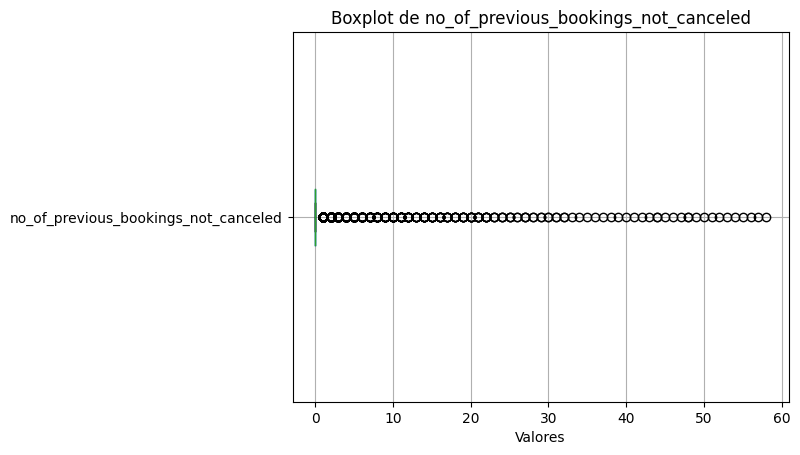

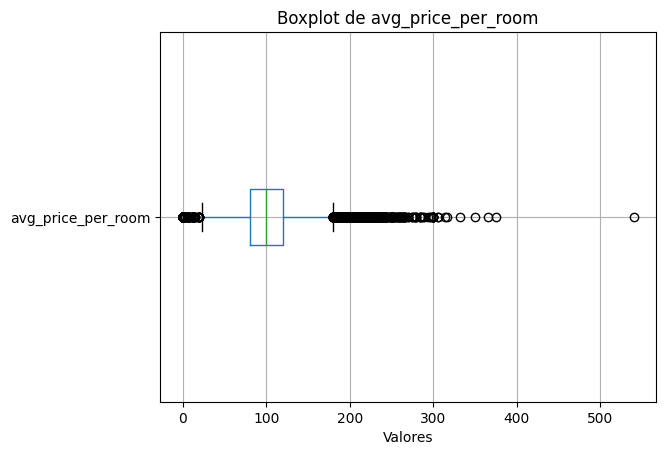

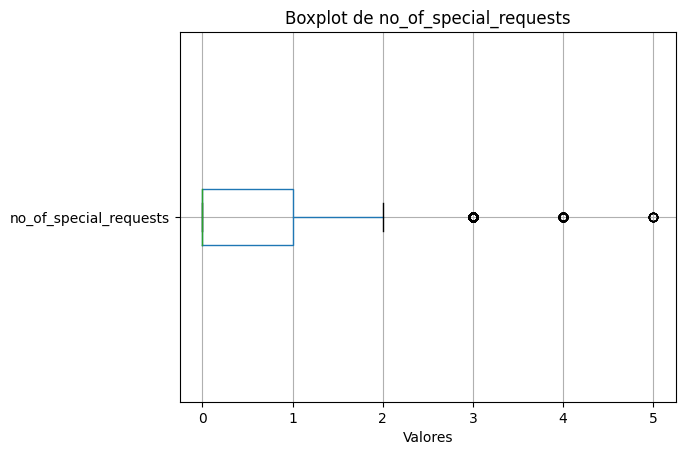

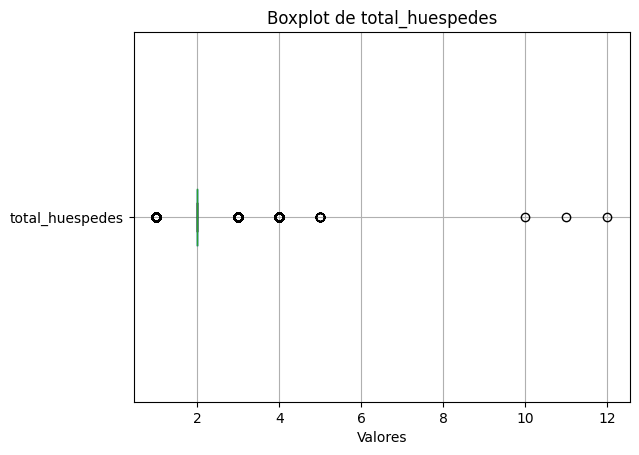

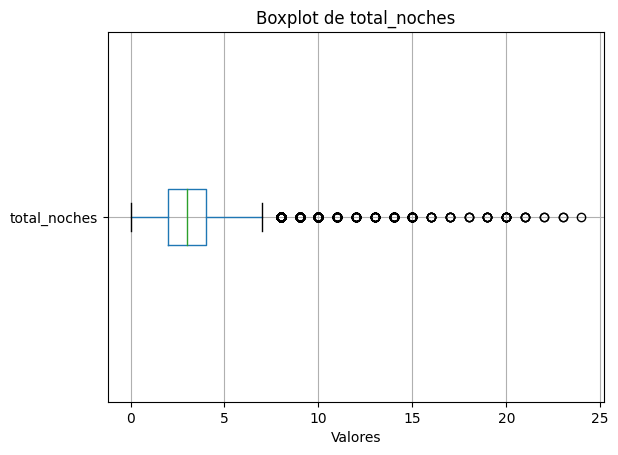

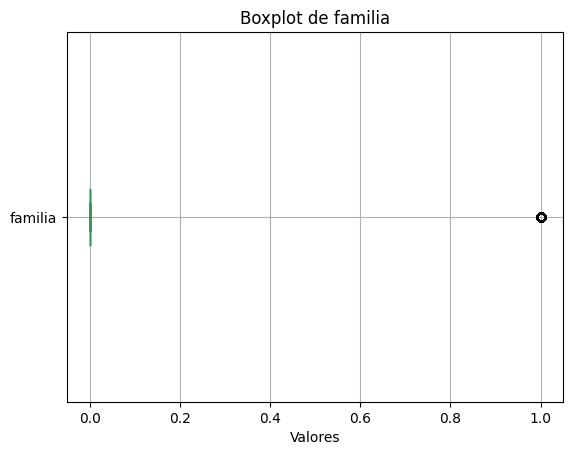

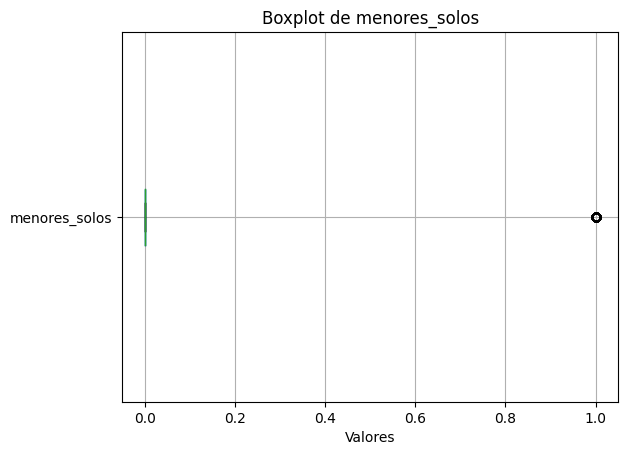

In [33]:
numeric_columns = dfOriginal.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns:
    plt.figure()
    dfOriginal.boxplot(column=column, vert=False)
    plt.title(f'Boxplot de {column}')
    plt.xlabel('Valores')
    plt.show()

In [34]:
numeric_columns = dfOriginal.select_dtypes(include=['float64', 'int64'])
for columna in numeric_columns:
    maximo = dfOriginal[columna].max()
    minimo = dfOriginal[columna].min()
    media =  dfOriginal[columna].mean()
    mediana = dfOriginal[columna].median()
    print(f"Columna: {columna}")
    print(f"Máximo: {maximo}")
    print(f"Mínimo: {minimo}")
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")

    print("\n")

Columna: Booking_ID
Máximo: 36275
Mínimo: 1
Media: 18138.0
Mediana: 18138.0


Columna: no_of_adults
Máximo: 4
Mínimo: 0
Media: 1.8449620951068229
Mediana: 2.0


Columna: no_of_children
Máximo: 10
Mínimo: 0
Media: 0.10527911784975878
Mediana: 0.0


Columna: no_of_weekend_nights
Máximo: 7
Mínimo: 0
Media: 0.810723638869745
Mediana: 1.0


Columna: no_of_week_nights
Máximo: 17
Mínimo: 0
Media: 2.2043004824259134
Mediana: 2.0


Columna: type_of_meal_plan
Máximo: 3
Mínimo: 0
Media: 0.9499655410062027
Mediana: 1.0


Columna: required_car_parking_space
Máximo: 1
Mínimo: 0
Media: 0.0309855272226051
Mediana: 0.0


Columna: room_type_reserved
Máximo: 7
Mínimo: 1
Media: 1.7088904203997244
Mediana: 1.0


Columna: lead_time
Máximo: 443
Mínimo: 0
Media: 85.23255685733976
Mediana: 57.0


Columna: arrival_year
Máximo: 2018
Mínimo: 2017
Media: 2017.8204272915232
Mediana: 2018.0


Columna: arrival_month
Máximo: 12
Mínimo: 1
Media: 7.423652653342522
Mediana: 8.0


Columna: arrival_date
Máximo: 31
Mínimo: 

**Reservas de nenes sin adultos**

In [35]:
filtered_data = dfOriginal[dfOriginal['no_of_adults'] == 0]['no_of_children']
count = filtered_data.value_counts()
print(count)

2    133
3      5
1      1
Name: no_of_children, dtype: int64


Hay 139 registros que no tienen adultos en sus reservas pero sí chicos, lo que llama la atención.
Se puede tratar de reservas en las que los menores son de entre 16 y 18 años (pueden alojarse solos en muchos paises pero cuentan como menores).

**Cantidad de noches de fin de semana**

In [36]:
filtered_data = dfOriginal[dfOriginal['no_of_weekend_nights'] == 7]['no_of_week_nights']
print(filtered_data)

19512    17
Name: no_of_week_nights, dtype: int64


Hay un solo registro de 7 noches de fin de semana. Una persona que reservó para 17 días de semana (24 días en total)

**Anticipación de la reserva (lead_time)**

Valor mas alto es 443, siendo un año y dos meses aproximadamente. Hay hoteles que permiten esa anticipación

**Precio promedio por noche**

En la variable precio promedio por noche, los valores son muy variados. Los valores van desde 0 a 540. La mediana es 99,45 euros

Es llamativo que hay 545 registros que el precio promedio por noche es 0. En el caso de que se traten de Complementary puede que sean 0 debido a qué son compensaciones.


In [37]:
summary = dfOriginal['avg_price_per_room'].describe()
count = dfOriginal[dfOriginal['avg_price_per_room'] == 0]['avg_price_per_room'].count()
counts = dfOriginal[dfOriginal['avg_price_per_room'] == 0].groupby('market_segment_type').size()

Al tratarse de registros de Complementary y de Online, los de Online deben imputarse. Se imputan los valores en el que el costo promedio por noche es 0 euros, por la media de los costos de las reservas "Online", asumiendo que es un error de la base.


In [38]:
for index, row in dfOriginal.iterrows():
    if row['avg_price_per_room'] == 0 and row['market_segment_type'] == 'Complementary':
        continue
    elif row['avg_price_per_room'] == 0 and row['market_segment_type'] == 'Online':
        mean_price = dfOriginal.loc[dfOriginal['market_segment_type'] == 'Online', 'avg_price_per_room'].mean()
        dfOriginal.at[index, 'avg_price_per_room'] = mean_price

# Análisis de variable Target

In [39]:
dfOriginal.booking_status.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [40]:
estadisticas = dfOriginal['booking_status'].describe()
print(estadisticas)

count            36275
unique               2
top       Not_Canceled
freq             24390
Name: booking_status, dtype: object


In [41]:
conteo = dfOriginal['booking_status'].value_counts()
for valor, frecuencia in conteo.items():
    print(f"Valor: {valor}, Frecuencia: {frecuencia}")

Valor: Not_Canceled, Frecuencia: 24390
Valor: Canceled, Frecuencia: 11885


Not_Canceled, Frecuencia: 24390

Canceled, Frecuencia: 11885

**Gráfico de barras de la variable target**

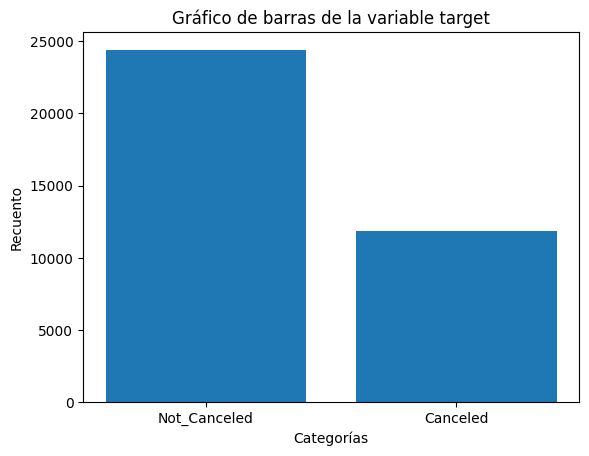

In [42]:
counts = dfOriginal['booking_status'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Categorías')
plt.ylabel('Recuento')
plt.title(f'Gráfico de barras de la variable target')
plt.show()

**Precio promedio dependiendo de cancelados o no cancelados**

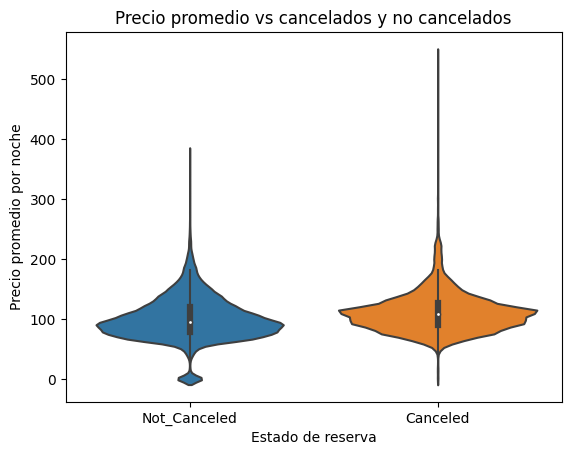

In [43]:
sns.violinplot(data=dfOriginal, x='booking_status', y='avg_price_per_room')
plt.xlabel('Estado de reserva')
plt.ylabel('Precio promedio por noche')
plt.title('Precio promedio vs cancelados y no cancelados')
plt.show()

**Reservas canceladas o no canceladas por tipo de habitación**

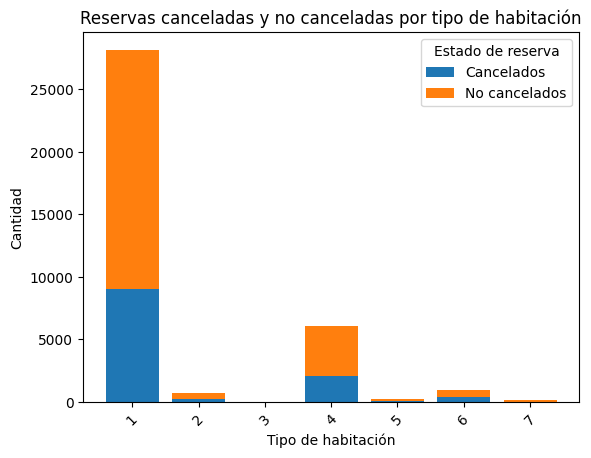

In [44]:
cancelados = dfOriginal[dfOriginal['booking_status'] == 'Canceled']
no_cancelados = dfOriginal[dfOriginal['booking_status'] == 'Not_Canceled']

cancelados_por_tipo = cancelados['room_type_reserved'].value_counts()
no_cancelados_por_tipo = no_cancelados['room_type_reserved'].value_counts()

tipos_habitacion = dfOriginal['room_type_reserved'].unique()

cancelados_counts = [cancelados_por_tipo.get(tipo, 0) for tipo in tipos_habitacion]
no_cancelados_counts = [no_cancelados_por_tipo.get(tipo, 0) for tipo in tipos_habitacion]

plt.bar(tipos_habitacion, cancelados_counts, label='Cancelados')
plt.bar(tipos_habitacion, no_cancelados_counts, bottom=cancelados_counts, label='No cancelados')

plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad')
plt.title('Reservas canceladas y no canceladas por tipo de habitación')
plt.legend(title='Estado de reserva')
plt.xticks(rotation=45)
plt.show()


**Reservas canceladas y no canceladas por anticipación de la reserva**

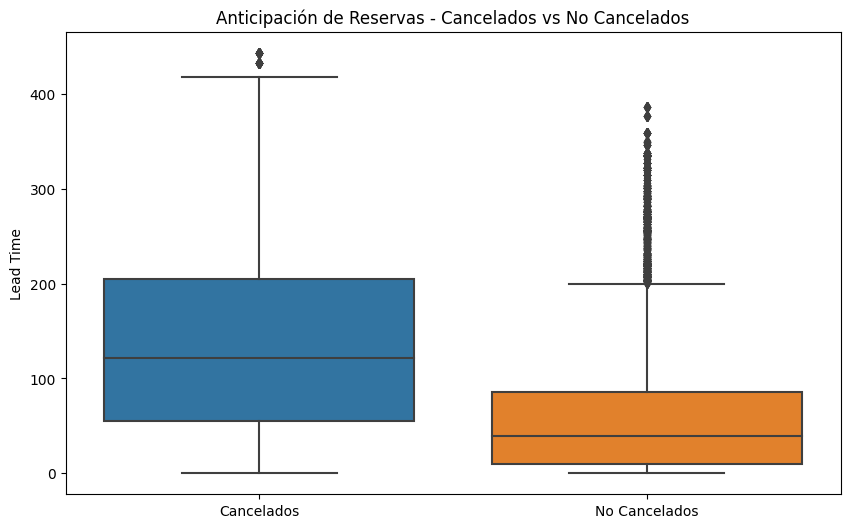

In [45]:
cancelados_lead_time = dfOriginal[dfOriginal['booking_status'] == 'Canceled']['lead_time']
no_cancelados_lead_time = dfOriginal[dfOriginal['booking_status'] != 'Canceled']['lead_time']

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=[cancelados_lead_time, no_cancelados_lead_time], ax=ax)
ax.set_xticklabels(['Cancelados', 'No Cancelados'])
ax.set_ylabel('Lead Time')
ax.set_title('Anticipación de Reservas - Cancelados vs No Cancelados')

plt.show()

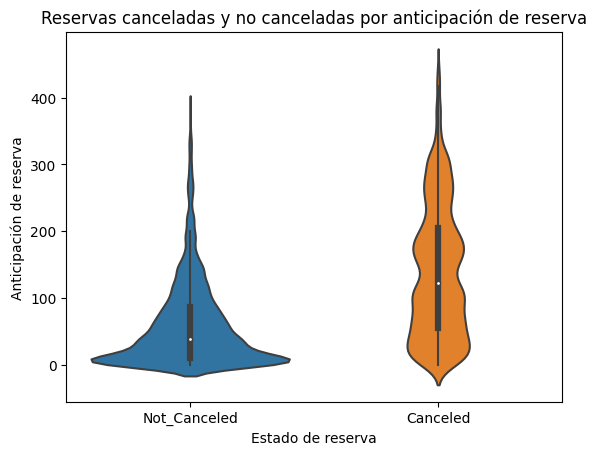

In [46]:
sns.violinplot(data=dfOriginal, x='booking_status', y='lead_time')
plt.xlabel('Estado de reserva')
plt.ylabel('Anticipación de reserva')
plt.title('Reservas canceladas y no canceladas por anticipación de reserva')
plt.show()

**Reservas canceladas y no canceladas por mes**

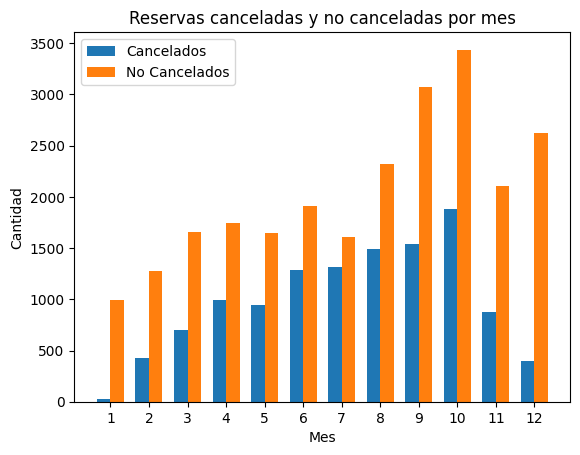

In [47]:
cancelados_por_mes = dfOriginal[dfOriginal['booking_status'] == 'Canceled']['arrival_month'].value_counts().sort_index()
no_cancelados_por_mes = dfOriginal[dfOriginal['booking_status'] != 'Canceled']['arrival_month'].value_counts().sort_index()

meses_ordenados = sorted(dfOriginal['arrival_month'].unique(), key=lambda x: int(x))
indice = np.arange(len(meses_ordenados))
ancho_barra = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(indice - ancho_barra/2, cancelados_por_mes.reindex(meses_ordenados), ancho_barra, label='Cancelados')
rects2 = ax.bar(indice + ancho_barra/2, no_cancelados_por_mes.reindex(meses_ordenados), ancho_barra, label='No Cancelados')

ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')
ax.set_title('Reservas canceladas y no canceladas por mes')
ax.set_xticks(indice)
ax.set_xticklabels(meses_ordenados)
ax.legend()

plt.show()

**Reservas canceladas y no canceladas por segmento de mercado**

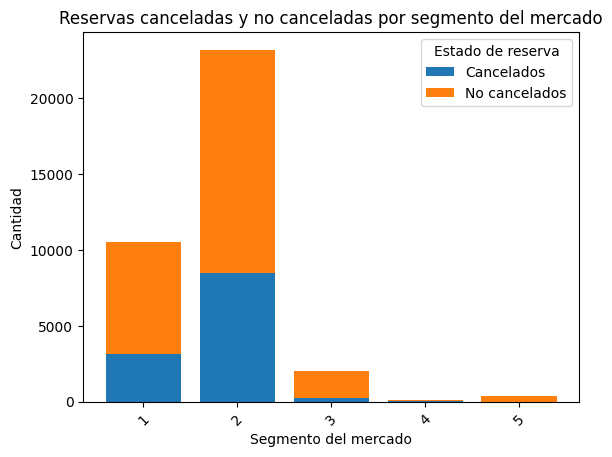

In [48]:
cancelados = dfOriginal[dfOriginal['booking_status'] == 'Canceled']
no_cancelados = dfOriginal[dfOriginal['booking_status'] == 'Not_Canceled']

cancelados_por_tipo = cancelados['market_segment_type'].value_counts()
no_cancelados_por_tipo = no_cancelados['market_segment_type'].value_counts()

tipos_habitacion = dfOriginal['market_segment_type'].unique()

cancelados_counts = [cancelados_por_tipo.get(tipo, 0) for tipo in tipos_habitacion]
no_cancelados_counts = [no_cancelados_por_tipo.get(tipo, 0) for tipo in tipos_habitacion]

plt.bar(tipos_habitacion, cancelados_counts, label='Cancelados')
plt.bar(tipos_habitacion, no_cancelados_counts, bottom=cancelados_counts, label='No cancelados')

plt.xlabel('Segmento del mercado')
plt.ylabel('Cantidad')
plt.title('Reservas canceladas y no canceladas por segmento del mercado')
plt.legend(title='Estado de reserva')
plt.xticks(rotation=45)
plt.show()

**Reservas canceladas y no canceladas por cantidad de requerimientos especiales**

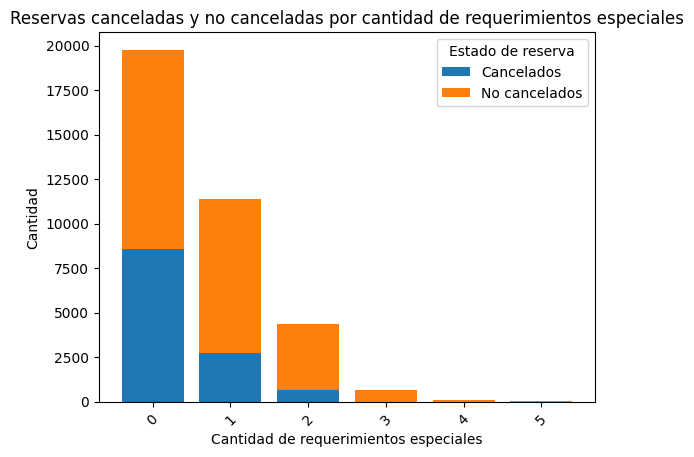

In [49]:
cancelados = dfOriginal[dfOriginal['booking_status'] == 'Canceled']
no_cancelados = dfOriginal[dfOriginal['booking_status'] == 'Not_Canceled']

cancelados_por_tipo = cancelados['no_of_special_requests'].value_counts()
no_cancelados_por_tipo = no_cancelados['no_of_special_requests'].value_counts()

tipos_habitacion = dfOriginal['no_of_special_requests'].unique()

cancelados_counts = [cancelados_por_tipo.get(tipo, 0) for tipo in tipos_habitacion]
no_cancelados_counts = [no_cancelados_por_tipo.get(tipo, 0) for tipo in tipos_habitacion]

plt.bar(tipos_habitacion, cancelados_counts, label='Cancelados')
plt.bar(tipos_habitacion, no_cancelados_counts, bottom=cancelados_counts, label='No cancelados')

plt.xlabel('Cantidad de requerimientos especiales')
plt.ylabel('Cantidad')
plt.title('Reservas canceladas y no canceladas por cantidad de requerimientos especiales')
plt.legend(title='Estado de reserva')
plt.xticks(rotation=45)
plt.show()

**Transformo en variable numérica**

In [50]:
dfOriginal.loc[dfOriginal['booking_status'] == "Not_Canceled", 'booking_status'] = '0'
dfOriginal.loc[dfOriginal['booking_status'] == "Canceled", 'booking_status'] = '1'

# Análisis de correlación

**Correlación de Pearson**

<ipython-input-51-3d5d42c47208>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfOriginal.corr()


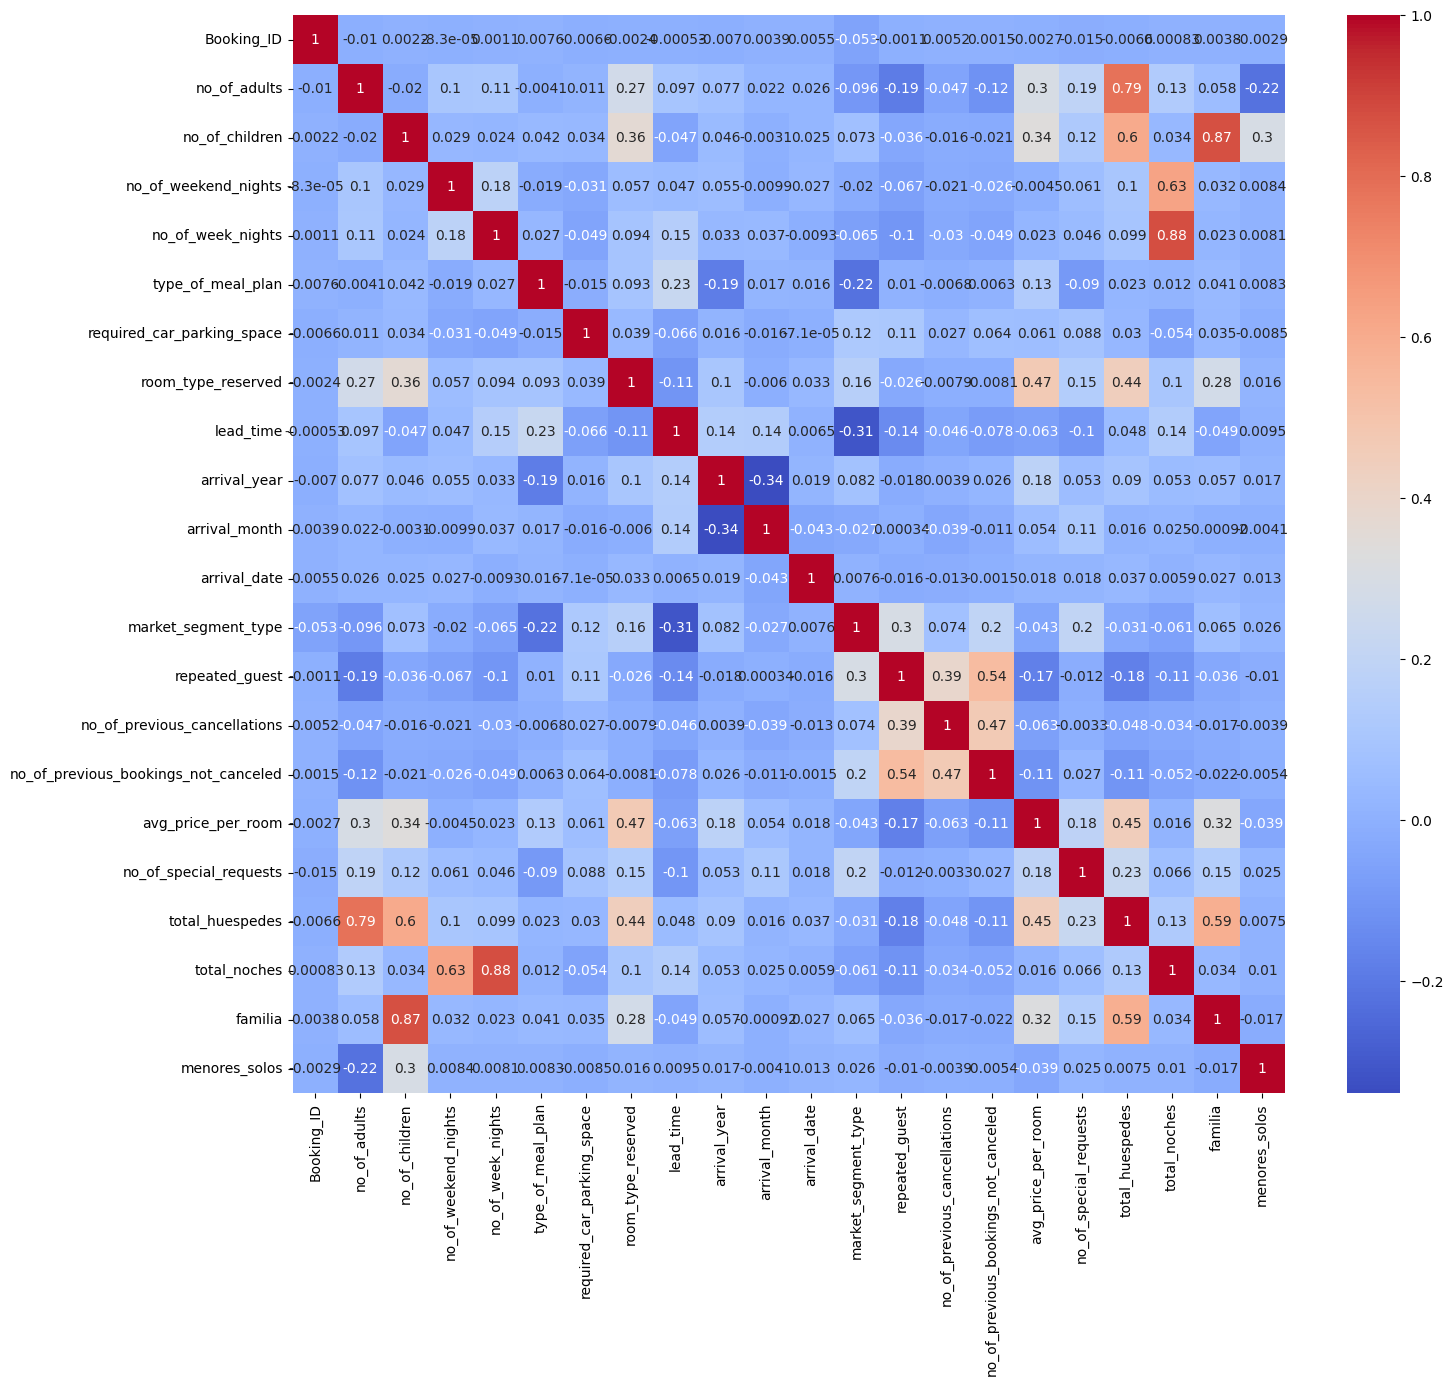

In [51]:
correlation_matrix = dfOriginal.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Las variables correlacionadas positivamente están en rojo y las variables negativamente correlacionadas están en azul.
Las variables que mas estan correlacionadas positivamente son cliente repetido con la cantidad de reservas previas no canceladas. Esto tiene sentido debido a que tiene que ver con la fidelidad del cliente. Si ya es cliente, tendra menos reservas canceladas debido a que realiza reservas frecuentemente y esta comprometido con el lugar.

En cuanto a las correlaciones negativas ninguna es significativa, asi como tampoco otras positivas. Las demas variables no se encuentran correlacionadas entre si.

**Correlación de Spearman**

In [52]:
dfOriginal.corr(method="spearman")

<ipython-input-52-0881a68a6120>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfOriginal.corr(method="spearman")


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_huespedes,total_noches,familia,menores_solos
Booking_ID,1.000000,-0.010855,0.003100,0.000245,0.001418,0.007939,-0.006579,-0.002401,-0.000939,-0.006980,...,-0.064500,-0.001076,0.002485,-0.002020,-0.002899,-0.015621,-0.007976,-0.000286,0.003849,-0.002943
no_of_adults,-0.010855,1.000000,0.029713,0.119551,0.136607,-0.008574,0.009649,0.265778,0.166432,0.075419,...,-0.047520,-0.202869,-0.099709,-0.206596,0.283488,0.199253,0.885822,0.194591,0.065085,-0.136193
no_of_children,0.003100,0.029713,1.000000,0.031165,0.018637,0.044787,0.032924,0.230261,-0.025875,0.058753,...,0.094537,-0.037520,-0.026415,-0.033902,0.243964,0.135135,0.482602,0.031152,0.968652,0.229157
no_of_weekend_nights,0.000245,0.119551,0.031165,1.000000,0.018310,-0.019299,-0.030240,0.061625,0.099491,0.058787,...,0.002075,-0.067933,-0.032250,-0.066075,-0.026429,0.065898,0.120106,0.564415,0.030187,0.008462
no_of_week_nights,0.001418,0.136607,0.018637,0.018310,1.000000,0.045337,-0.054632,0.101892,0.245444,0.032631,...,-0.077512,-0.114454,-0.045158,-0.123036,0.018209,0.044925,0.129528,0.811317,0.016806,0.009324
type_of_meal_plan,0.007939,-0.008574,0.044787,-0.019299,0.045337,1.000000,-0.014723,0.100708,0.198581,-0.186449,...,-0.284390,0.011492,0.007567,0.010585,0.151882,-0.101919,0.013974,0.028966,0.043381,0.009101
required_car_parking_space,-0.006579,0.009649,0.032924,-0.030240,-0.054632,-0.014723,1.000000,0.036803,-0.078732,0.015684,...,0.121516,0.110909,0.032409,0.118156,0.056357,0.094386,0.023978,-0.062763,0.035233,-0.008516
room_type_reserved,-0.002401,0.265778,0.230261,0.061625,0.101892,0.100708,0.036803,1.000000,-0.052943,0.104980,...,0.185080,-0.033385,-0.030066,-0.025713,0.395287,0.142407,0.349696,0.120850,0.205207,0.082947
lead_time,-0.000939,0.166432,-0.025875,0.099491,0.245444,0.198581,-0.078732,-0.052943,1.000000,0.149966,...,-0.328509,-0.195886,-0.101156,-0.190897,-0.020530,-0.080659,0.133343,0.261069,-0.029331,0.014685
arrival_year,-0.006980,0.075419,0.058753,0.058787,0.032631,-0.186449,0.015684,0.104980,0.149966,1.000000,...,0.122657,-0.018175,-0.043306,0.016720,0.188076,0.069210,0.093594,0.058210,0.056805,0.017391


In [53]:
correlation_matrix = dfOriginal.corr(method='spearman')
variables_correlacionadas = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix != 1)]
correlation_series = variables_correlacionadas.stack()
columnas_correlacionadas = correlation_series.index
valores_correlacion = correlation_series.values

for columna, valor in zip(columnas_correlacionadas, valores_correlacion):
    print("Columnas: ", columna)
    print("Correlación: ", valor)
    print()

<ipython-input-53-1f66f7ea207b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfOriginal.corr(method='spearman')


Columnas:  ('no_of_adults', 'total_huespedes')
Correlación:  0.8858215485944744

Columnas:  ('no_of_children', 'familia')
Correlación:  0.9686517094347825

Columnas:  ('no_of_weekend_nights', 'total_noches')
Correlación:  0.5644147435596676

Columnas:  ('no_of_week_nights', 'total_noches')
Correlación:  0.8113166871665991

Columnas:  ('repeated_guest', 'no_of_previous_cancellations')
Correlación:  0.5978674684316045

Columnas:  ('repeated_guest', 'no_of_previous_bookings_not_canceled')
Correlación:  0.9327745667745501

Columnas:  ('no_of_previous_cancellations', 'repeated_guest')
Correlación:  0.5978674684316045

Columnas:  ('no_of_previous_bookings_not_canceled', 'repeated_guest')
Correlación:  0.9327745667745501

Columnas:  ('total_huespedes', 'no_of_adults')
Correlación:  0.8858215485944744

Columnas:  ('total_noches', 'no_of_weekend_nights')
Correlación:  0.5644147435596676

Columnas:  ('total_noches', 'no_of_week_nights')
Correlación:  0.8113166871665991

Columnas:  ('familia', 'n

No se obtienen resultados significativos. Las variables que tienen alta correlación están asociadas a corrrelaciones lógicas como por ejemplo cantidad de adultos y total de huespedes. Al igual que en la correlación anterior, se identifica una correlación entre cliente repetido y cantidad de reservas no canceladas

# Visualizaciones

**Reservas por mes y por año**

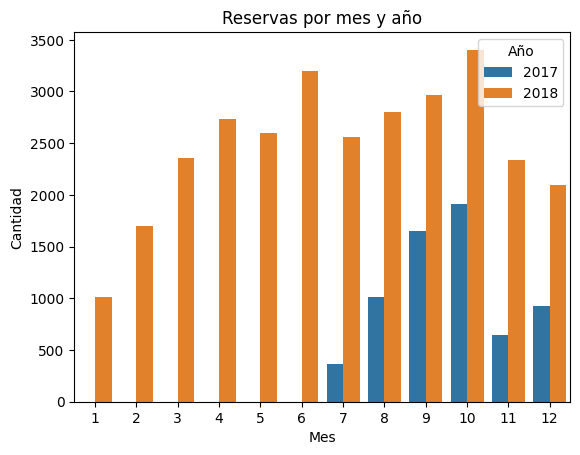

In [54]:
total_mes = dfOriginal.groupby(['arrival_month', 'arrival_year']).size().reset_index(name='cantidad')
sns.barplot(data=total_mes, x='arrival_month', y='cantidad', hue='arrival_year')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Reservas por mes y año')
plt.legend(title='Año')
plt.show()

**Reservas por precio promedio y segmento del mercado (modo de realización de la reserva)**

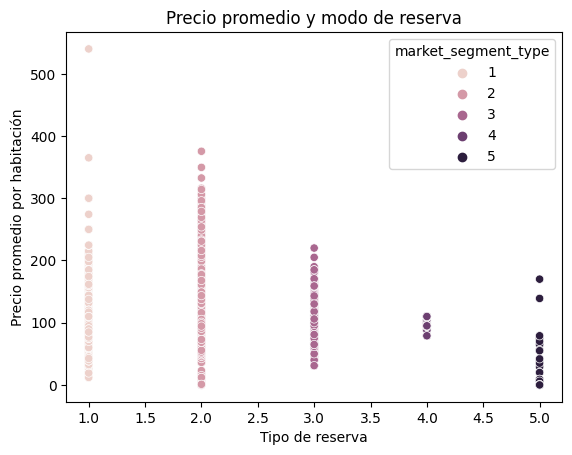

In [55]:
sns.scatterplot(data=dfOriginal, x='market_segment_type', y='avg_price_per_room', hue='market_segment_type')
plt.xlabel('Tipo de reserva')
plt.ylabel('Precio promedio por habitación')
plt.title('Precio promedio y modo de reserva')
plt.show()


**Reservas por segmento del mercado y anticipación en la realización de la misma**

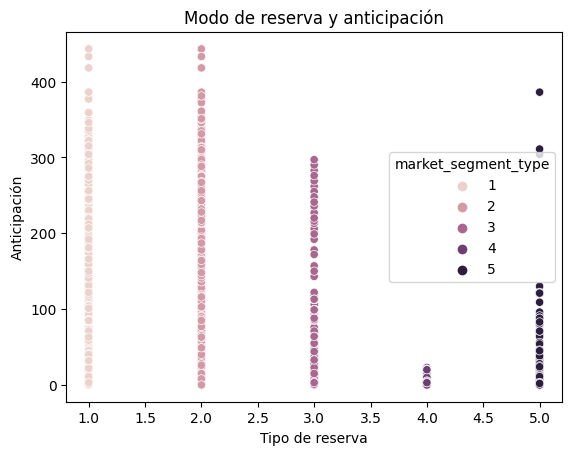

In [56]:
sns.scatterplot(data=dfOriginal, x='market_segment_type', y='lead_time', hue='market_segment_type')
plt.xlabel('Tipo de reserva')
plt.ylabel('Anticipación')
plt.title('Modo de reserva y anticipación')
plt.show()


**Reservas por tipo de habitación**

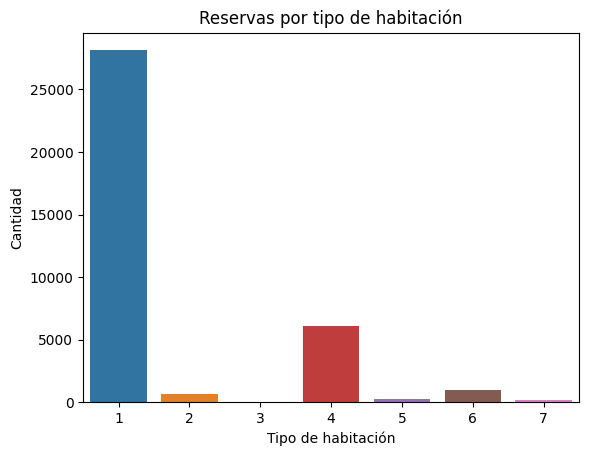

In [57]:
sns.countplot(data=dfOriginal, x='room_type_reserved')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad')
plt.title('Reservas por tipo de habitación')
plt.show()


**Reservas por tipo de comida**

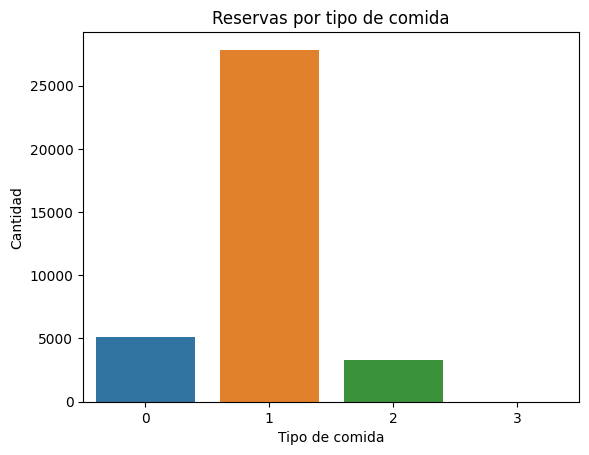

In [58]:
sns.countplot(data=dfOriginal, x='type_of_meal_plan')
plt.xlabel('Tipo de comida')
plt.ylabel('Cantidad')
plt.title('Reservas por tipo de comida')
plt.show()

**Anticipación de las reservas por año**

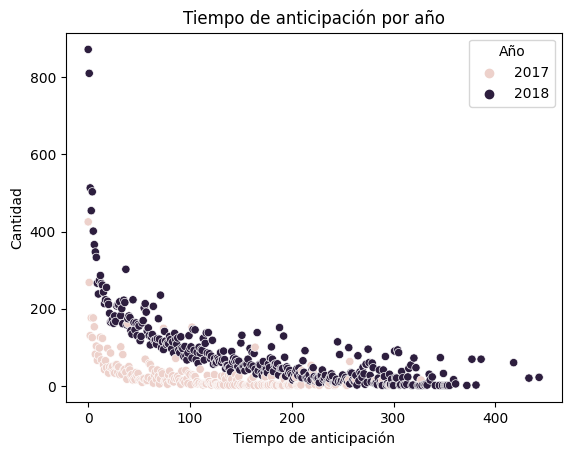

In [59]:
tiempo = dfOriginal.groupby(['lead_time', 'arrival_year']).size().reset_index(name='cantidad')
sns.scatterplot(data=tiempo, x='lead_time', y='cantidad', hue='arrival_year')
plt.xlabel('Tiempo de anticipación')
plt.ylabel('Cantidad')
plt.title('Tiempo de anticipación por año')
plt.legend(title='Año')
plt.show()


**Cantidad de reservas por cantidad total de huéspedes**

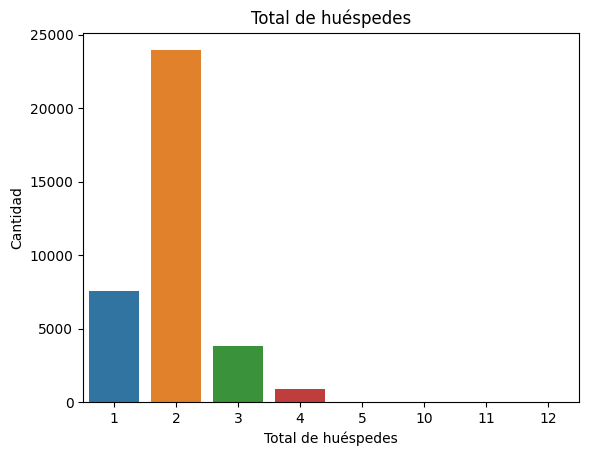

In [60]:
sns.countplot(data=dfOriginal, x='total_huespedes')
plt.xlabel('Total de huéspedes')
plt.ylabel('Cantidad')
plt.title('Total de huéspedes')
plt.show()


**Cantidad de reservas por cantidad de adultos**

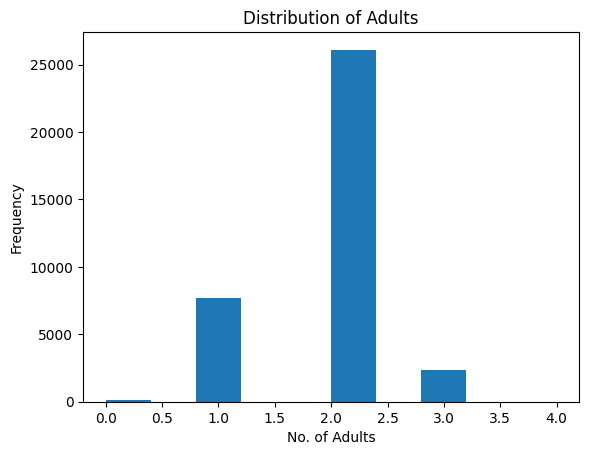

In [61]:
plt.hist(dfOriginal['no_of_adults'])
plt.xlabel('No. of Adults')
plt.ylabel('Frequency')
plt.title('Distribution of Adults')
plt.show()

**Total de personas por mes, especificando adultos y niños**

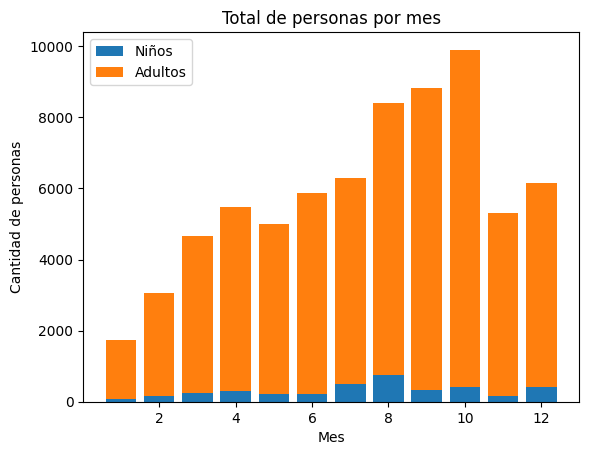

In [62]:
total_personas_por_mes = dfOriginal.groupby('arrival_month')['total_huespedes'].sum().reset_index()
total_adultos_por_mes = dfOriginal.groupby('arrival_month')['no_of_adults'].sum().reset_index()
total_ninos_por_mes = dfOriginal.groupby('arrival_month')['no_of_children'].sum().reset_index()

plt.bar(total_personas_por_mes['arrival_month'], total_ninos_por_mes['no_of_children'], label='Niños')
plt.bar(total_personas_por_mes['arrival_month'], total_adultos_por_mes['no_of_adults'], bottom=total_ninos_por_mes['no_of_children'], label='Adultos')

plt.xlabel('Mes')
plt.ylabel('Cantidad de personas')
plt.title('Total de personas por mes')
plt.legend()
plt.show()


**Cantidad de reservas por segmento de mercado, especificando reservas de familias**

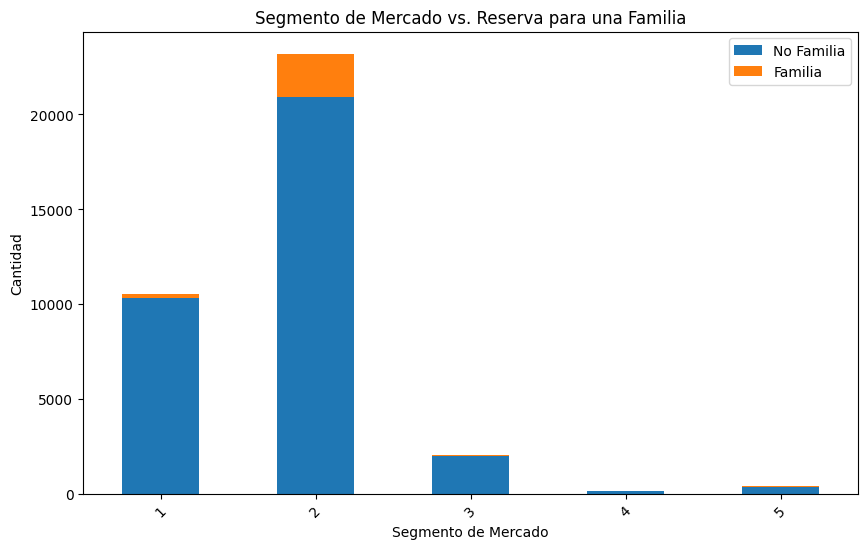

In [63]:
segmento_familia = dfOriginal.groupby(['market_segment_type', 'familia']).size().unstack()

fig, ax = plt.subplots(figsize=(10, 6))

segmento_familia.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Segmento de Mercado')
ax.set_ylabel('Cantidad')
ax.set_title('Segmento de Mercado vs. Reserva para una Familia')

plt.xticks(rotation=45)
plt.legend(['No Familia', 'Familia'])

plt.show()

**Cantidad de huéspedes y precio promedio por tipo de habitación**

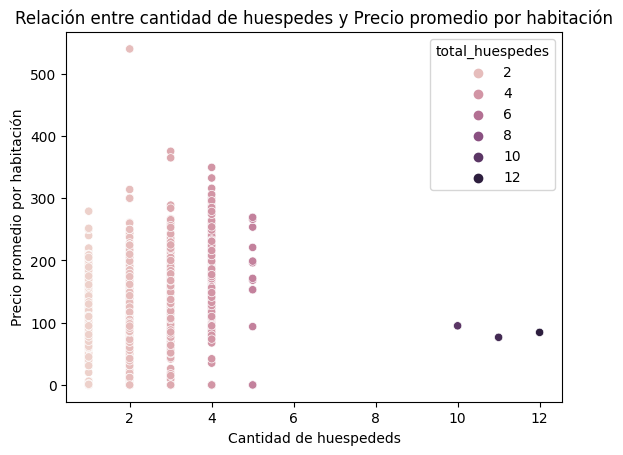

In [64]:
sns.scatterplot(data=dfOriginal, x='total_huespedes', y='avg_price_per_room', hue='total_huespedes')
plt.xlabel('Cantidad de huespededs')
plt.ylabel('Precio promedio por habitación')
plt.title('Relación entre cantidad de huespedes y Precio promedio por habitación')

plt.show()

# Partición de la base

Realizaré una partición en tres partes.
- La base train será la que voy a usar para entrenar los modelos
- La base validación será la que utilizare para verificar el funcionamiento de los modelos
- La base test será la que guardaré hasta el final para probar el funcionamiento de los mejores modelos, a modo de asegurarme de no comparar con esos resultados previmente y hacer el análisis mas serio


La partición será estratificada porque al tener una diferente cantidad de reservas canceladas y no canceladas, considero importante que esten equilibradas en ambas bases.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
columnas = dfOriginal.columns.tolist()
columnas = [col for col in columnas if col not in ["booking_status", "fecha_llegada"]]
print(columnas)

['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_huespedes', 'total_noches', 'familia', 'menores_solos']


In [67]:
dfOriginal.dtypes

Booking_ID                                int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
total_huespedes                           int64
total_noches                            

In [68]:
X = dfOriginal[columnas]
y = dfOriginal['booking_status']

X_val_train, X_test, y_val_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train, X_test_train, y_train, y_test_train = train_test_split(X_val_train, y_val_train, test_size=0.20, stratify=y_val_train)

X_val_train: Conjunto de características para validación y entrenamiento

y_val_train: Conjunto de variable objetivo para validación y entrenamiento

X_test: Conjunto de características para prueba

y_test: Conjunto de variable objetivo para prueba

X_train: Conjunto de características para entrenamiento

y_train: Conjunto de variable objetivo para entrenamiento

X_test_train: Conjunto de características para prueba en el conjunto train

y_test_train: Conjunto de variable objetivo para prueba en el conjunto train

In [69]:
print(X_val_train.shape) #para probar modelos completo
print(y_val_train.shape)
print(X_test.shape) #testeo/ bobeda
print(y_test.shape)
print(X_train.shape) #division de val para entrenar
print(y_train.shape)
print(X_test_train.shape) #division de val para testear
print(y_test_train.shape)

(29020, 22)
(29020,)
(7255, 22)
(7255,)
(23216, 22)
(23216,)
(5804, 22)
(5804,)


# Modelos

## Librerias

In [70]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
from xgboost import XGBClassifier

In [ ]:
!pip install catboost

In [78]:
from catboost import CatBoostClassifier

In [79]:
import lightgbm as lgb

##Función creada para evaluar los modelos

In [195]:
def evaluar_modelo(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, pos_label='1')
    recall = recall_score(y_test, pred, pos_label='1')
    f1 = f1_score(y_test, pred, pos_label='1')
    roc_auc = roc_auc_score(y_test, pred)
    logloss = log_loss(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    classrep = classification_report(y_test, pred)
    print("Exactitud (Accuracy):", accuracy)
    print("Precisión (Precision):", precision)
    print("Sensibilidad (Recall):", recall)
    print("Valor F1 (F1-Score):", f1)
    print("AUC-ROC:", roc_auc)
    print("Log Loss:", logloss)
    print('Classification report:\n', classrep)
    print("Matriz de Confusión:")
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(2) + 0.5, ["CANCELED", "NOT CANCELED"])
    plt.yticks(np.arange(2) + 0.5, ["CANCELED", "NOT CANCELED"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix\n", size = 13)
    plt.show()

Utilizo cancelado como clase positiva ya que es lo relevante para el caso de negocio analizado

## Decision Tree Classifier

In [81]:
dtcn = DecisionTreeClassifier()

**Busqueda del valor óptimo de hiperparametro 'max_depth'**

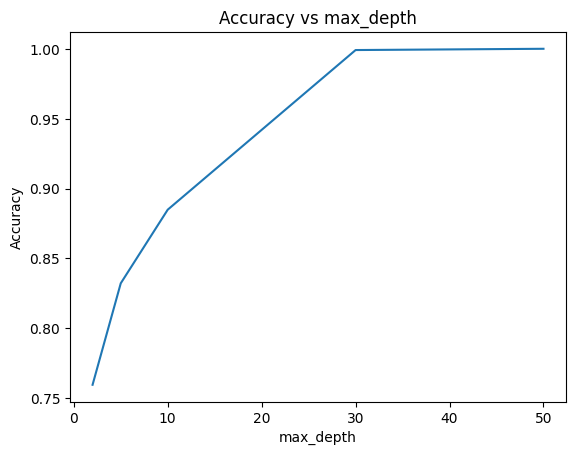

In [82]:
max_depth_values = [2, 5, 10, 30, 50]
accuracy_scores = []

for depth in max_depth_values:
    dtcn = DecisionTreeClassifier(max_depth=depth)
    dtcn.fit(X_train, y_train)
    accuracy = dtcn.score(X_train, y_train)
    accuracy_scores.append(accuracy)

plt.plot(max_depth_values, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.show()

**Creación de modelo con 'max_depth' óptimo**

In [83]:
dtc = DecisionTreeClassifier(max_depth = 30)

**Búsqueda de hiperparametros con GridSearch**

In [84]:
dtc = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'auto', 'sqrt']
}

In [85]:
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [86]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)
print(best_model)

{'criterion': 'entropy', 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)


**Predicción del modelo**

In [87]:
preddtc = best_model.predict(X_test_train)
accpred = accuracy_score(y_test_train, preddtc)

In [88]:
print("Accuracy del modelo:", accpred)

Accuracy del modelo: 0.8637146795313577


**Feature importance del modelo**

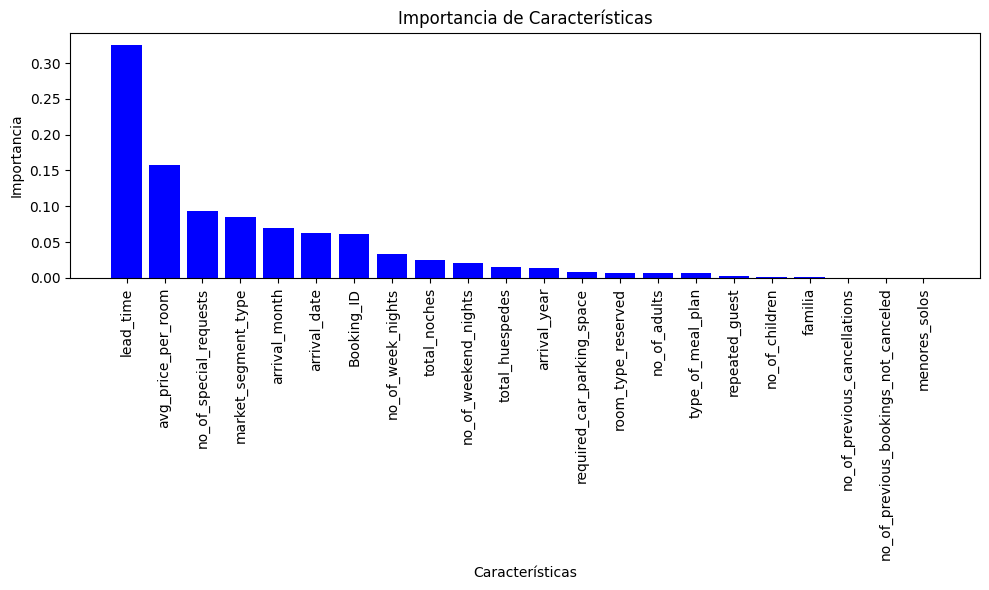

In [89]:
importances = best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

## Random Forest Classifier

In [90]:
rfcn = RandomForestClassifier()

**Busqueda del valor óptimo de hiperparametro 'n_estimators'**

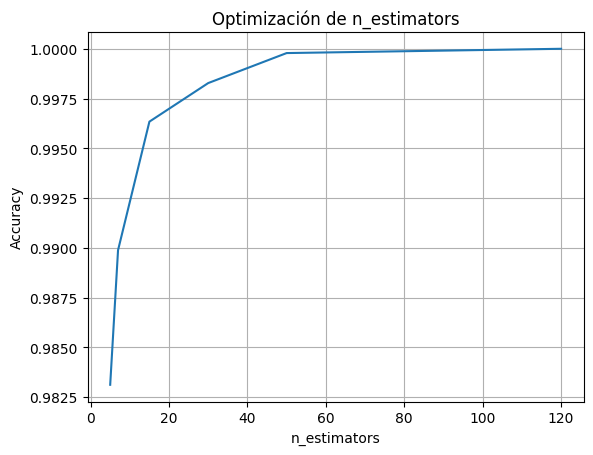

In [91]:
n_estimators_values = [5, 7, 15, 30, 50, 120]
accuracy_scores = []

for estimators in n_estimators_values:
    rfcn = RandomForestClassifier(n_estimators=estimators)
    rfcn.fit(X_train, y_train)
    acc = rfcn.score(X_train, y_train)
    accuracy_scores.append(acc)

plt.plot(n_estimators_values, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Optimización de n_estimators')
plt.grid(True)
plt.show()

**Creación de modelo con 'n_estimators' óptimo**

In [92]:
rfcnn = RandomForestClassifier(n_estimators=50)

**Búsqueda de hiperparametros con GridSearch**

In [93]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt']
}

In [94]:
grid_search = GridSearchCV(estimator=rfcnn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]})

In [95]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [96]:
rfc = RandomForestClassifier(n_estimators=50,
                                     max_depth=best_params['max_depth'],
                                     min_samples_split=best_params['min_samples_split'],
                                     min_samples_leaf=best_params['min_samples_leaf'])


**Predicción del modelo**

In [97]:
rfc.fit(X_train, y_train)
accuracy = rfc.score(X_test_train, y_test_train)

In [98]:
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.8967953135768436


**Feature importance del modelo**

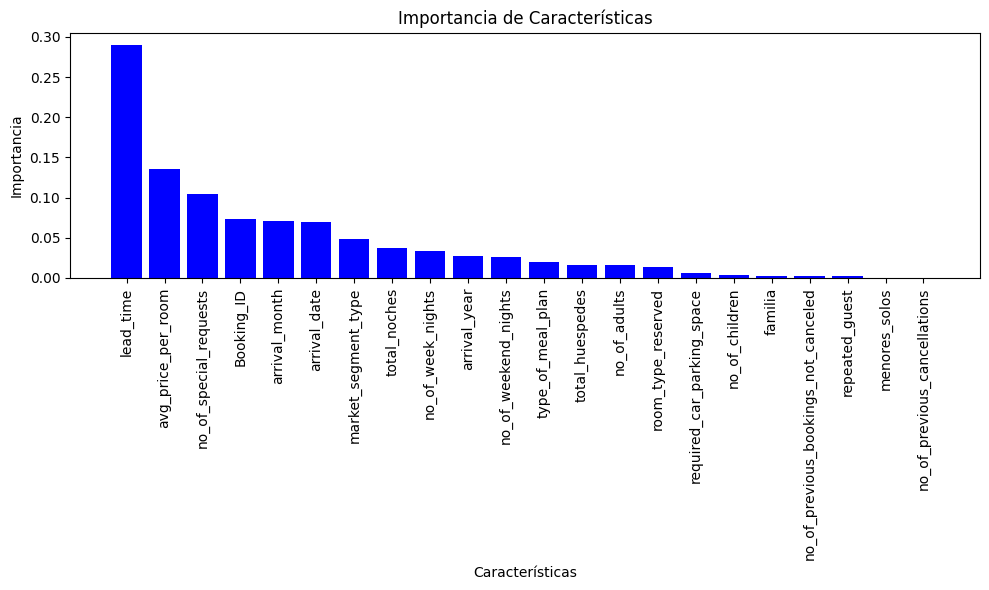

In [99]:
importances = rfc.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

## Extra Tree Classifier

In [112]:
etcn = ExtraTreesClassifier()

**Busqueda del valor óptimo de hiperparametro 'max_depth'**

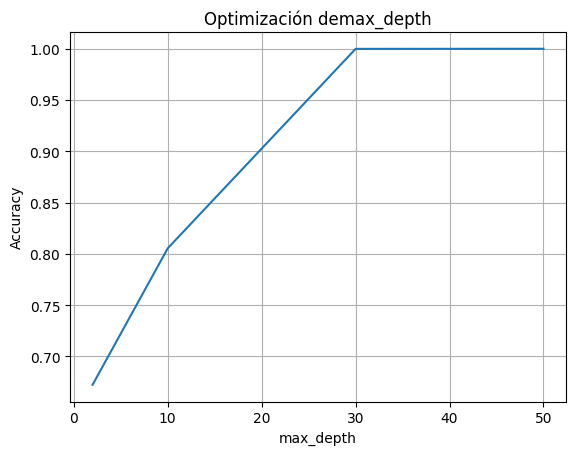

In [125]:
max_depth_values = [2, 10, 30, 50]
accuracy_scores = []

for values in max_depth_values:
    etcn = ExtraTreesClassifier(max_depth=values)
    etcn.fit(X_train, y_train)
    acc = etcn.score(X_train, y_train)
    accuracy_scores.append(acc)

plt.plot(max_depth_values, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Optimización demax_depth')
plt.grid(True)
plt.show()

**Creación de modelo con 'max_depth' óptimo**

In [126]:
etc = ExtraTreesClassifier(max_depth = 30)

**Búsqueda de hiperparametros con GridSearch**

In [127]:
param_grid = {
    'n_estimators': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt']
    }

In [128]:
grid_search = GridSearchCV(etc, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(max_depth=30),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 5, 10]},
             scoring='accuracy')

In [129]:
best_params = grid_search.best_params_
print(best_params)

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


In [130]:
best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)

ExtraTreesClassifier(min_samples_split=10, n_estimators=10)

**Predicción del modelo**

In [131]:
etcpred = best_model.predict(X_test_train)
accuracy = accuracy_score(y_test_train, etcpred)

In [132]:
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.8783597518952446


**Feature importance del modelo**

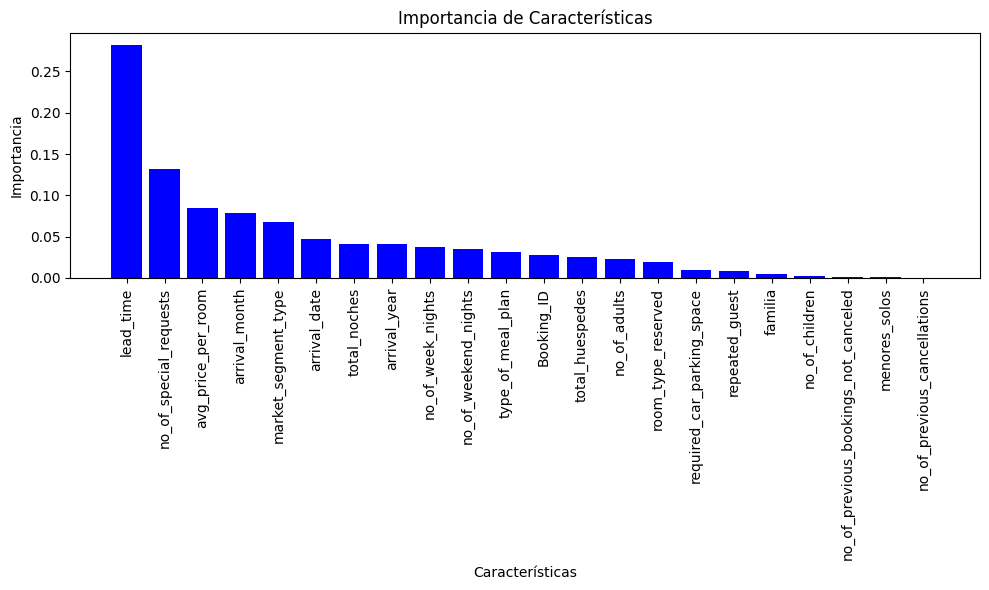

In [133]:
importances = best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

## Catboost

In [138]:
cbcn = CatBoostClassifier()

**Busqueda del valor óptimo de hiperparametro 'n_estimators'**

Learning rate set to 0.5
0:	learn: 0.4767235	total: 5.59ms	remaining: 22.4ms
1:	learn: 0.4136594	total: 10.9ms	remaining: 16.3ms
2:	learn: 0.3903123	total: 16ms	remaining: 10.7ms
3:	learn: 0.3730935	total: 20.9ms	remaining: 5.23ms
4:	learn: 0.3629150	total: 27.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4767235	total: 8.04ms	remaining: 48.2ms
1:	learn: 0.4136594	total: 14.9ms	remaining: 37.1ms
2:	learn: 0.3903123	total: 20.1ms	remaining: 26.8ms
3:	learn: 0.3730935	total: 25.4ms	remaining: 19.1ms
4:	learn: 0.3629150	total: 31.4ms	remaining: 12.6ms
5:	learn: 0.3543314	total: 39.1ms	remaining: 6.51ms
6:	learn: 0.3473032	total: 51.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4767235	total: 5.62ms	remaining: 135ms
1:	learn: 0.4136594	total: 11.1ms	remaining: 128ms
2:	learn: 0.3903123	total: 19.4ms	remaining: 142ms
3:	learn: 0.3730935	total: 24.7ms	remaining: 129ms
4:	learn: 0.3629150	total: 30.1ms	remaining: 120ms
5:	learn: 0.3543314	total: 35.2ms	remaining: 111ms
6:	

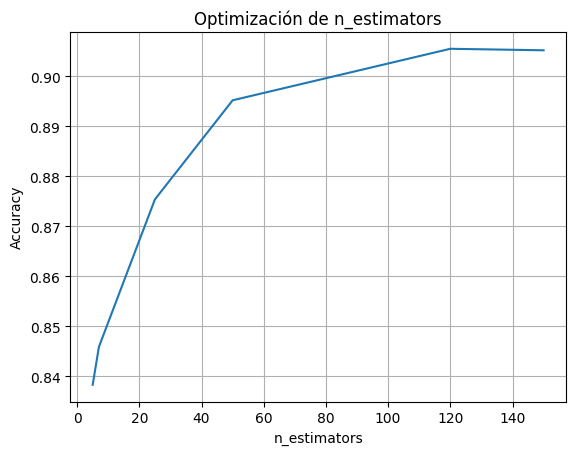

In [139]:
n_estimators_values = [5, 7, 25, 50, 120, 150]
accuracy_scores = []

for estimators in n_estimators_values:
    cbcn = CatBoostClassifier(n_estimators=estimators)
    cbcn.fit(X_train, y_train)
    acc = cbcn.score(X_train, y_train)
    accuracy_scores.append(acc)

plt.plot(n_estimators_values, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Optimización de n_estimators')
plt.grid(True)
plt.show()

**Creación del modelo con 'n_estimators' óptimo**

In [140]:
cbc = CatBoostClassifier(n_estimators = 120)

**Búsqueda de hiperparametros con GridSearch**

In [145]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 4, 5, 6],
    'subsample': [0.5, 0.7, 0.9],
}

In [146]:
grid_search = GridSearchCV(estimator=cbc, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
40:	learn: 0.5137352	total: 187ms	remaining: 360ms
41:	learn: 0.5112791	total: 194ms	remaining: 360ms
42:	learn: 0.5090763	total: 201ms	remaining: 360ms
43:	learn: 0.5066479	total: 205ms	remaining: 354ms
44:	learn: 0.5041721	total: 209ms	remaining: 349ms
45:	learn: 0.5025047	total: 216ms	remaining: 347ms
46:	learn: 0.5000713	total: 220ms	remaining: 342ms
47:	learn: 0.4977864	total: 224ms	remaining: 336ms
48:	learn: 0.4953676	total: 230ms	remaining: 333ms
49:	learn: 0.4934419	total: 234ms	remaining: 328ms
50:	learn: 0.4916248	total: 238ms	remaining: 322ms
51:	learn: 0.4891995	total: 242ms	remaining: 317ms
52:	learn: 0.4873799	total: 247ms	remaining: 312ms
53:	learn: 0.4855469	total: 251ms	remaining: 307ms
54:	learn: 0.4837615	total: 255ms	remaining: 302ms
55:	learn: 0.4817905	total: 259ms	remaining: 297ms
56:	learn: 0.4801276	total: 264ms	remaining: 291ms
57:	learn: 0.4789245	total: 269ms	remaining: 288ms
58:	learn: 0.47

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd30c1474f0>,
             param_grid={'depth': [3, 4, 5, 6],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='accuracy')

In [147]:
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_

{'depth': 6, 'learning_rate': 0.1, 'subsample': 0.9}


**Predicción del modelo**

In [148]:
catpred = best_model.predict(X_test_train)
accuracy = accuracy_score(y_test_train, catpred)

In [149]:
print("Accuracy del modelo", accuracy)

Accuracy del modelo 0.8780151619572708


**Feautre importance del modelo**

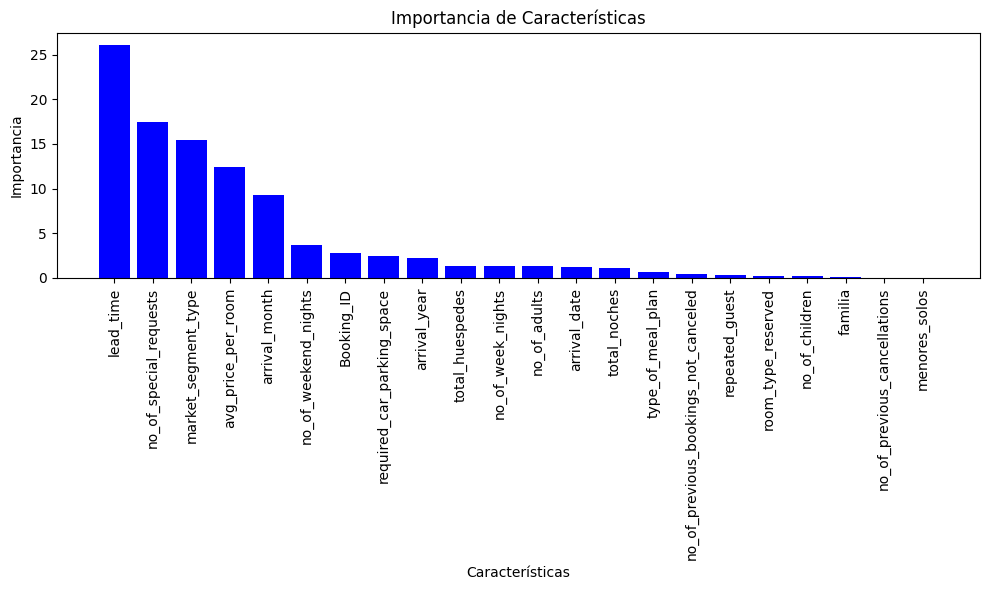

In [150]:
importances = best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

## Adaboost

In [160]:
abcn = AdaBoostClassifier()

**Busqueda del valor óptimo de hiperparametro 'learning_rate'**

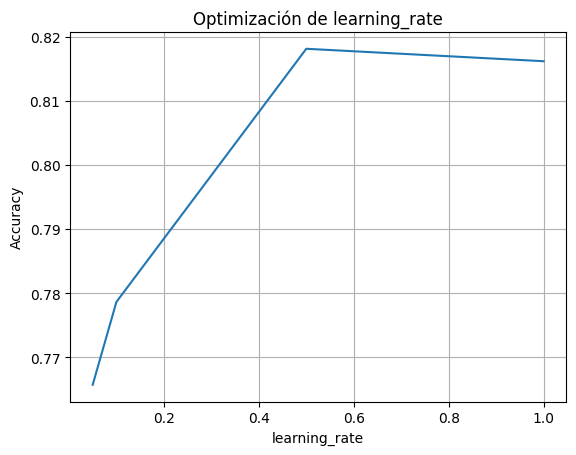

In [162]:
learning_rates_values = [0.05, 0.1, 0.5, 1.0]
accuracy_scores = []

for rates in learning_rates_values:
    abcn = AdaBoostClassifier(learning_rate=rates)
    abcn.fit(X_train, y_train)
    acc = abcn.score(X_train, y_train)
    accuracy_scores.append(acc)

plt.plot(learning_rates_values, accuracy_scores)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Optimización de learning_rate')
plt.grid(True)
plt.show()

**Creación del modelo con 'learning_rate' óptimo**

In [163]:
abc = AdaBoostClassifier(learning_rate = 0.5)

**Busco hiperparametros con GridSearch**

In [164]:
parameters = {
    'n_estimators': [50, 100, 200],
}

In [165]:
grid_search = GridSearchCV(abc, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(learning_rate=0.5),
             param_grid={'n_estimators': [50, 100, 200]}, scoring='accuracy')

In [166]:
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_

{'n_estimators': 200}


**Predicción del modelo**

In [167]:
abcpred = best_model.predict(X_test_train)
accuracy = accuracy_score(y_test_train, abcpred)

In [168]:
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.8273604410751206


**Feature importance del modelo**

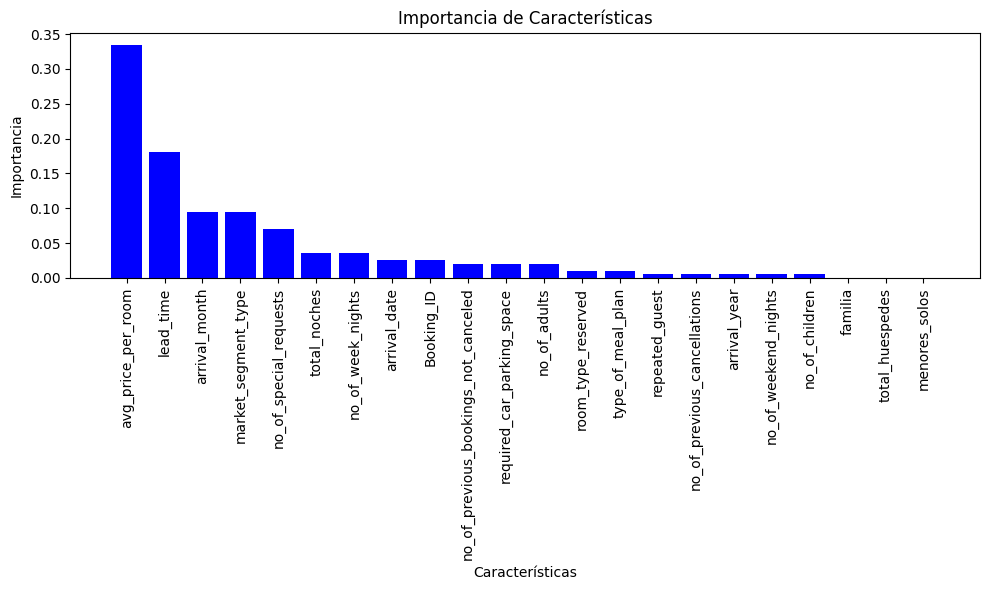

In [169]:
importances = best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

## Light GBM

In [177]:
lgbmcn = lgb.LGBMClassifier()

**Busqueda del valor óptimo de hiperparametro 'learning_rate'**

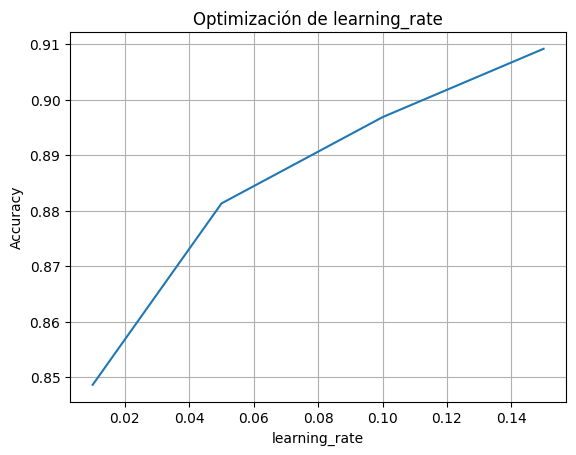

In [178]:
learning_rates_values = [0.15, 0.1, 0.05, 0.01]
accuracy_scores = []

for rates in learning_rates_values:
    lgbmcn = lgb.LGBMClassifier(learning_rate=rates)
    lgbmcn.fit(X_train, y_train)
    acc = lgbmcn.score(X_train, y_train)
    accuracy_scores.append(acc)

plt.plot(learning_rates_values, accuracy_scores)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Optimización de learning_rate')
plt.grid(True)
plt.show()

**Creación del modelo con 'learning_rate' óptimo**

In [179]:
lgbmc = lgb.LGBMClassifier(learning_rate = 0.15)

**Búsqueda de hiperparametros con GridSearch**

In [180]:
parameters = {
    'num_leaves': [20, 30, 40],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, -1],
    'min_child_samples': [10, 20, 30],
}

In [181]:
grid_search = GridSearchCV(lgbmc, parameters, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(learning_rate=0.15),
             param_grid={'max_depth': [5, 10, -1],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='accuracy')

In [182]:
best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_

{'max_depth': -1, 'min_child_samples': 10, 'n_estimators': 300, 'num_leaves': 40}


**Predicción del modelo**

In [183]:
lgbmpred = best_model.predict(X_test_train)
accuracy = accuracy_score(y_test_train, lgbmpred)

In [184]:
print("Accuracy del modelo:", accuracy)

Accuracy del modelo: 0.8957615437629222


**Feature importance del modelo**

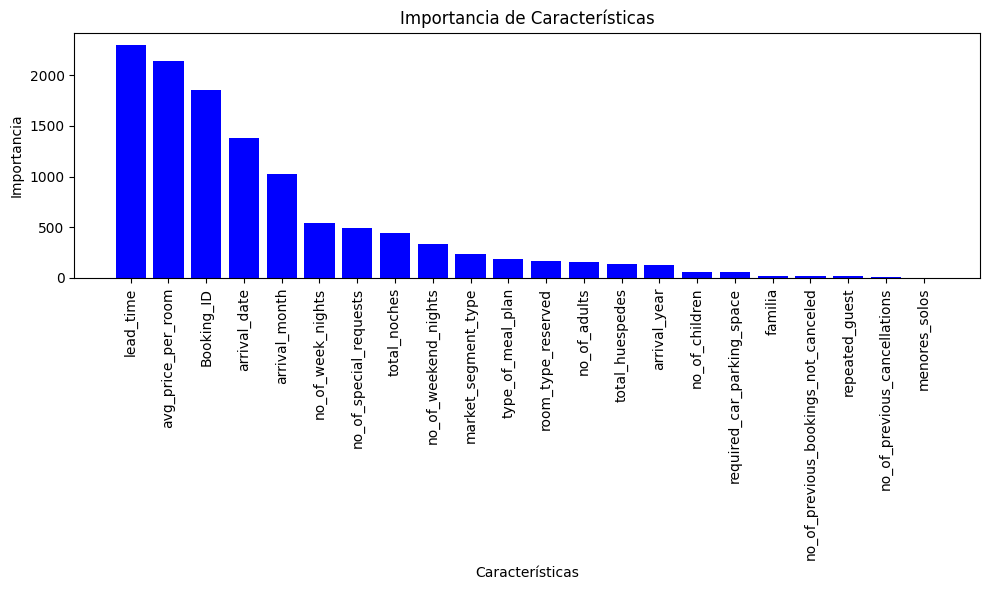

In [185]:
importances = best_model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

## Comparación de modelos

**Random Forest Classifier**

Exactitud (Accuracy): 0.8952446588559614
Precisión (Precision): 0.883357041251778
Sensibilidad (Recall): 0.783761043331931
Valor F1 (F1-Score): 0.8305840392331698
AUC-ROC: 0.866665269513444
Log Loss: 3.77576520685445
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      4878
           1       0.88      0.78      0.83      2377

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.90      0.89      7255

Matriz de Confusión:


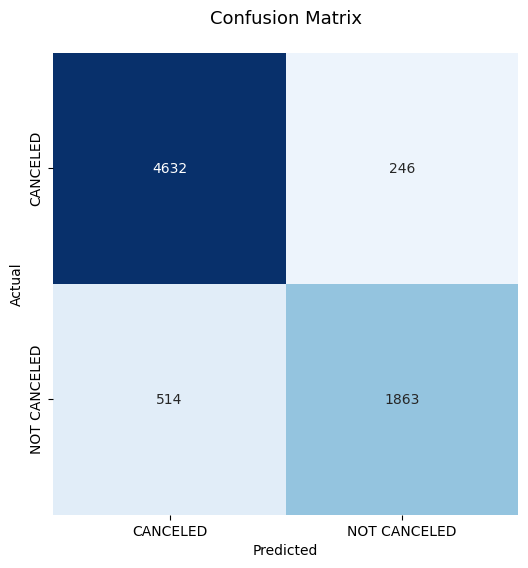

In [196]:
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
evaluar_modelo(y_test, y_test_pred)

**Light GBM**

Exactitud (Accuracy): 0.8900068917987595
Precisión (Precision): 0.8663573085846867
Sensibilidad (Recall): 0.7854438367690366
Valor F1 (F1-Score): 0.823918799646955
AUC-ROC: 0.8632016231815662
Log Loss: 3.964553467197173
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4878
           1       0.87      0.79      0.82      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255

Matriz de Confusión:


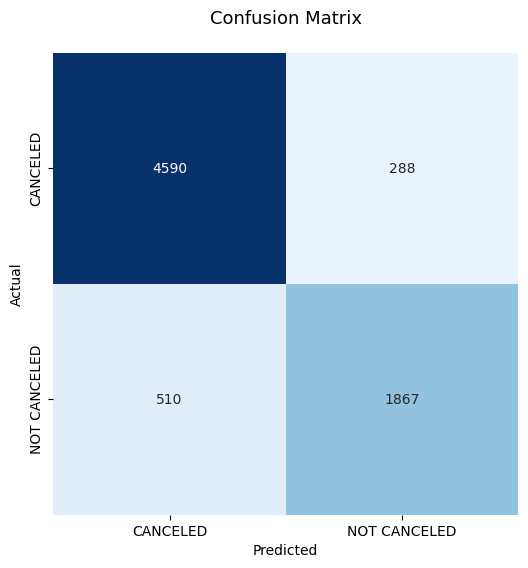

In [197]:
lgbmc.fit(X_train, y_train)
y_test_pred = lgbmc.predict(X_test)
evaluar_modelo(y_test, y_test_pred)

**Extra Tree**

Exactitud (Accuracy): 0.8908339076498967
Precisión (Precision): 0.8684332868433287
Sensibilidad (Recall): 0.785864535128313
Valor F1 (F1-Score): 0.8250883392226148
AUC-ROC: 0.8639244774862557
Log Loss: 3.93474479451148
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4878
           1       0.87      0.79      0.83      2377

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255

Matriz de Confusión:


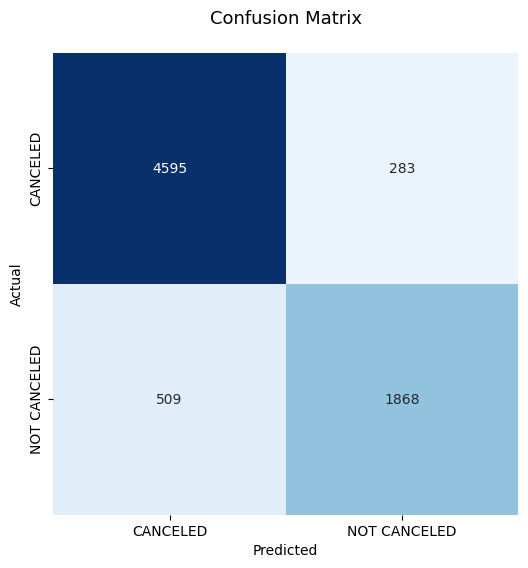

In [198]:
etc.fit(X_train, y_train)
y_test_pred = etc.predict(X_test)
evaluar_modelo(y_test, y_test_pred)

**CatBoost**

Learning rate set to 0.27575
0:	learn: 0.5434535	total: 5.37ms	remaining: 639ms
1:	learn: 0.4675351	total: 10.8ms	remaining: 640ms
2:	learn: 0.4263329	total: 16.5ms	remaining: 643ms
3:	learn: 0.4096021	total: 21.8ms	remaining: 631ms
4:	learn: 0.3916007	total: 27.2ms	remaining: 626ms
5:	learn: 0.3850760	total: 32.1ms	remaining: 610ms
6:	learn: 0.3754504	total: 37.3ms	remaining: 602ms
7:	learn: 0.3661251	total: 44.7ms	remaining: 626ms
8:	learn: 0.3607061	total: 49.8ms	remaining: 614ms
9:	learn: 0.3573013	total: 54.8ms	remaining: 603ms
10:	learn: 0.3512860	total: 60.3ms	remaining: 597ms
11:	learn: 0.3480065	total: 65.2ms	remaining: 587ms
12:	learn: 0.3409116	total: 70.8ms	remaining: 583ms
13:	learn: 0.3378592	total: 75.8ms	remaining: 574ms
14:	learn: 0.3330578	total: 81.2ms	remaining: 569ms
15:	learn: 0.3306480	total: 86.3ms	remaining: 561ms
16:	learn: 0.3279533	total: 91.4ms	remaining: 554ms
17:	learn: 0.3219433	total: 96.7ms	remaining: 548ms
18:	learn: 0.3198804	total: 102ms	remaining: 

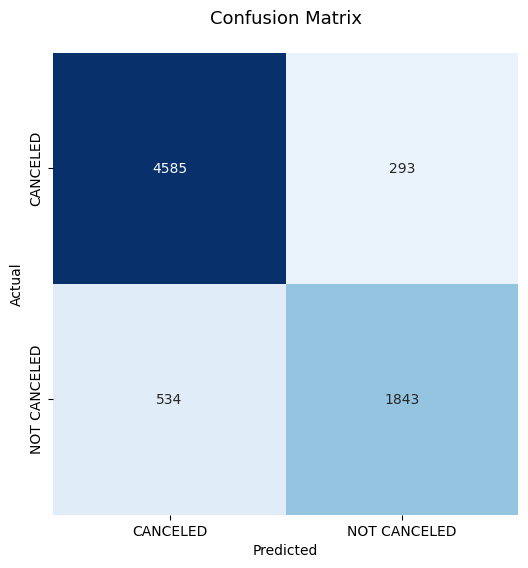

In [199]:
cbc.fit(X_train, y_train)
y_test_pred = cbc.predict(X_test)
evaluar_modelo(y_test, y_test_pred)

**Decision Tree**

Exactitud (Accuracy): 0.8525155065472089
Precisión (Precision): 0.7688194158782394
Sensibilidad (Recall): 0.7862852334875894
Valor F1 (F1-Score): 0.7774542429284526
AUC-ROC: 0.8355370406880341
Log Loss: 5.315879962281923
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4878
           1       0.77      0.79      0.78      2377

    accuracy                           0.85      7255
   macro avg       0.83      0.84      0.83      7255
weighted avg       0.85      0.85      0.85      7255

Matriz de Confusión:


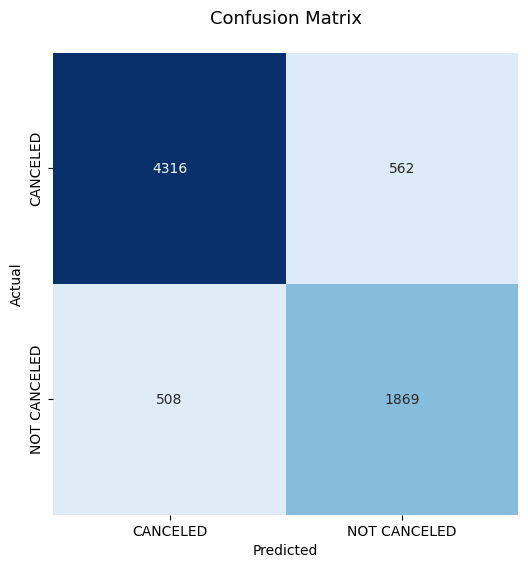

In [200]:
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
evaluar_modelo(y_test, y_test_pred)

**AdaBoost**

Exactitud (Accuracy): 0.8180565127498277
Precisión (Precision): 0.7569275644141954
Sensibilidad (Recall): 0.6550273453933529
Valor F1 (F1-Score): 0.7023004059539919
AUC-ROC: 0.7762631601915515
Log Loss: 6.557907990852467
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      4878
           1       0.76      0.66      0.70      2377

    accuracy                           0.82      7255
   macro avg       0.80      0.78      0.79      7255
weighted avg       0.81      0.82      0.81      7255

Matriz de Confusión:


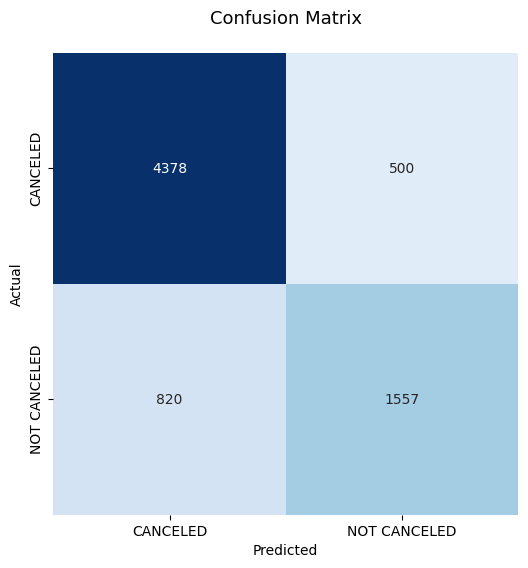

In [201]:
abc.fit(X_train, y_train)
y_test_pred = abc.predict(X_test)
evaluar_modelo(y_test, y_test_pred)